In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print

In [15]:
df = pd.read_csv(r"../data/raw/global_electricity_production_data.csv")
print(df.shape)
df.head()

(121074, 6)

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


In [16]:
def getMissingValues(df):
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values / len(df)
    return [missing_values], missing_values.__len__()

In [17]:
print(getMissingValues(df))

([value    0.000116
dtype: float64], 1)

In [18]:
df.drop('unit', axis=1, inplace=True)

In [19]:
df.head()

,country_name,date,parameter,product,value
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272


In [20]:
print(df.columns)
def getUniqueValues(df):
    unique_values = df.nunique().sort_values(ascending=False)
    return unique_values
print(getUniqueValues(df))

Index(['country_name', 'date', 'parameter', 'product', 'value'], dtype='object')

value           101983
date               168
country_name        48
product             16
parameter            7
dtype: int64

In [21]:
df = df.dropna(subset=['value'])

In [22]:
print(getMissingValues(df))

([Series([], dtype: float64)], 0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121060 entries, 0 to 121073
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_name  121060 non-null  object 
 1   date          121060 non-null  object 
 2   parameter     121060 non-null  object 
 3   product       121060 non-null  object 
 4   value         121060 non-null  float64
dtypes: float64(1), object(4)
memory usage: 5.5+ MB


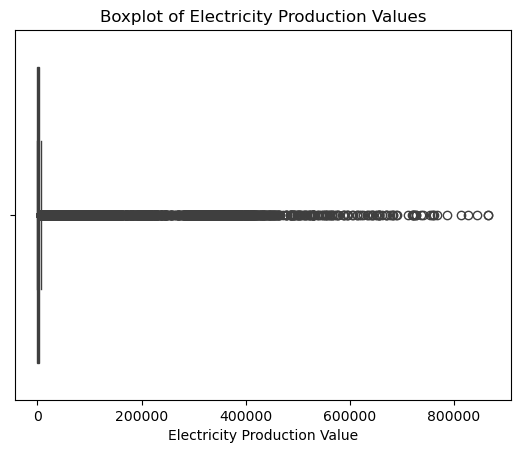

In [24]:
boxplot = sns.boxplot(x='value', data=df)
plt.title('Boxplot of Electricity Production Values')
plt.xlabel('Electricity Production Value')
plt.show()
 
#!this box plot is misleading because the data is not grouped by country yet, there are unique variations for each nation

In [25]:
distinct_product_values = df['product'].unique()
print(len(distinct_product_values))

15

In [26]:
print(df.head(30))

country_name       date                       parameter  \
0     Australia  12/1/2023      Net Electricity Production   
1     Australia  12/1/2023      Net Electricity Production   
2     Australia  12/1/2023      Net Electricity Production   
3     Australia  12/1/2023      Net Electricity Production   
4     Australia  12/1/2023      Net Electricity Production   
5     Australia  12/1/2023      Net Electricity Production   
6     Australia  12/1/2023      Net Electricity Production   
7     Australia  12/1/2023      Net Electricity Production   
8     Australia  12/1/2023      Net Electricity Production   
9     Australia  12/1/2023      Net Electricity Production   
10    Australia  12/1/2023         Used for pumped storage   
11    Australia  12/1/2023             Distribution Losses   
12    Australia  12/1/2023  Final Consumption (Calculated)   
13      Austria  12/1/2023      Net Electricity Production   
14      Austria  12/1/2023      Net Electricity Production   
15      Austria  12/1/2023      Net Electricity Production   
16      Austria  12/1/2023      Net Electricity Production   
17      Austria  12/1/2023      Net Electricity Production   
18      Austria  12/1/2023      Net Electricity Production   
19      Austria  12/1/2023      Net Electricity Production   
20      Austria  12/1/2023      Net Electricity Production   
21      Austria  12/1/2023      Net Electricity Production   
22      Austria  12/1/2023      Net Electricity Production   
23      Austria  12/1/2023      Net Electricity Production   
24      Austria  12/1/2023      Net Electricity Production   
25      Austria  12/1/2023      Net Electricity Production   
26      Austria  12/1/2023                   Total Imports   
27      Austria  12/1/2023                   Total Exports   
28      Austria  12/1/2023         Used for pumped storage   
29      Austria  12/1/2023             Distribution Losses   

                                              product       value  
0                                         Electricity  22646.1901  
1                             Total Combustible Fuels  13397.9356  
2                   Coal, Peat and Manufactured Gases   9768.5223  
3                          Oil and Petroleum Products    289.5415  
4                                         Natural Gas   3091.9272  
5                              Combustible Renewables    247.9446  
6                                               Hydro   1047.8540  
7                                                Wind   2719.2534  
8                                               Solar   5481.1471  
9   Total Renewables (Hydro, Geo, Solar, Wind, Other)   9496.1991  
10                                        Electricity     51.4665  
11                                        Electricity    992.7051  
12                                        Electricity  21602.0184  
13                                        Electricity   6783.2730  
14                            Total Combustible Fuels   1746.9034  
15                  Coal, Peat and Manufactured Gases    167.3548  
16                         Oil and Petroleum Products     73.8682  
17                                        Natural Gas   1035.0865  
18                             Combustible Renewables    407.4009  
19                   Other Combustible Non-Renewables     63.1929  
20                                              Hydro   4187.4854  
21                                               Wind    779.5912  
22                                              Solar     68.6574  
23                                         Geothermal      0.0025  
24                                      Not Specified      0.6331  
25  Total Renewables (Hydro, Geo, Solar, Wind, Other)   5443.1374  
26                                        Electricity   2160.8900  
27                                        Electricity   2035.1686  
28                                        Electricity    626.7909  
29                                      

In [27]:


df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.sort_values(['country_name', 'parameter', 'date'], inplace=True)

In [28]:
df

,country_name,date,parameter,product,value
85192,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630
85193,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790
85194,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350
85195,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030
85196,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380
...,...,...,...,...,...
3447,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827
2732,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621
2018,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564
1305,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819


In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def plotInfo(countryName:str):
    """choose a country from the following: ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States']"""
    
    selected_country = df[df['country_name'] == countryName]

    # Get unique parameters and products
    parameters = sorted(selected_country['parameter'].unique())
    all_products = sorted(df['product'].unique())

    # Create consistent color mapping for all products
    # Use 15 distinct colors from qualitative palettes (Plotly, D3, Alphabet)
    colors = [
        '#1f77b4',  # Plotly: Blue
        '#ff7f0e',  # Plotly: Orange
        '#2ca02c',  # Plotly: Green
        '#d62728',  # Plotly: Red
        '#9467bd',  # Plotly: Purple
        '#8c564b',  # Plotly: Brown
        '#e377c2',  # Plotly: Pink
        '#7f7f7f',  # Plotly: Gray
        '#bcbd22',  # Plotly: Olive
        '#17becf',  # Plotly: Cyan
        '#aec7e8',  # D3: Light Blue
        '#ffbb78',  # D3: Light Orange
        '#98df8a',  # D3: Light Green
        '#ff9896',  # D3: Light Red
        '#c5b0d5'   # D3: Light Purple
    ]
    color_discrete_map = dict(zip(all_products, colors))

    # Create subplot grid (3 rows, 2 columns)
    fig = make_subplots(
        rows=3, 
        cols=2,
        subplot_titles=parameters,
        vertical_spacing=0.12,
        horizontal_spacing=0.05
    )

    # Process each parameter
    for i, param in enumerate(parameters):
        # Get row and column position
        row = (i // 2) + 1
        col = (i % 2) + 1
        
        # Filter data for current parameter
        param_data = selected_country[selected_country['parameter'] == param]
        
        # Create pivot table to ensure complete date-product combinations
        pivot = param_data.pivot_table(
            index='date',
            columns='product',
            values='value',
            aggfunc='sum'
        ).reset_index()
        
        # Melt to long format for Plotly
        melted = pivot.melt(id_vars='date', value_name='value', var_name='product')
        
        # Add traces for each product
        for product in all_products:
            product_data = melted[melted['product'] == product]
            
            # Fill missing dates with 0
            full_dates = pd.date_range(
                start=selected_country['date'].min(),
                end=selected_country['date'].max(),
                freq='MS'
            )
            product_data = product_data.set_index('date').reindex(full_dates).fillna(0).reset_index()
            product_data['product'] = product
            
            # Add trace to subplot
            fig.add_trace(
                go.Scatter(
                    x=product_data['index'],
                    y=product_data['value'],
                    name=product,
                    mode='lines',
                    line=dict(width=2),
                    marker_color=color_discrete_map[product],
                    showlegend=(i == 0)  # Only show legend for first subplot
                ),
                row=row,
                col=col
            )

    # Update layout
    fig.update_layout(
        title_text=f'{countryName} Electricity Data (2010-2023)',
        height=1200,
        width=1400,
        legend_title_text='Product Types',
        hovermode='x unified'
    )

    # Format axes
    for i in range(1, 7):
        fig.update_xaxes(title_text='Date', row=(i+1)//2 if i%2==1 else (i)//2, col=1 if i%2==1 else 2)
        fig.update_yaxes(title_text='Value (GWh)', row=(i+1)//2, col=1 if i%2==1 else 2)

    # Improve subplot title positioning
    for idx, annotation in enumerate(fig['layout']['annotations']):
        # Calculate y position based on subplot row (3 rows, top row starts at y=1)
        row = 3 - (idx // 2)  # Row 1 (top) -> y~1, Row 2 -> y~0.62, Row 3 -> y~0.24
        y_pos = 1.0 - (row - 1) * (0.33 + 0.04)  # Adjust for increased vertical spacing
        annotation.update(y=y_pos, yanchor='bottom')

    fig.show()

In [30]:
all_countries = df["country_name"].unique()
all_countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [31]:
plotInfo("France")

/tmp/ipykernel_23888/3306798645.py:81: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_23888/3306798645.py:81: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_23888/3306798645.py:81: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_23888/3306798645.py:81: FutureWarning:

Downcasting object dtype array

In [32]:
plotInfo("United States")

/tmp/ipykernel_23888/3306798645.py:81: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_23888/3306798645.py:81: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_23888/3306798645.py:81: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_23888/3306798645.py:81: FutureWarning:

Downcasting object dtype array

/tmp/ipykernel_23888/2668386634.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_23888/2668386634.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_23888/2668386634.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

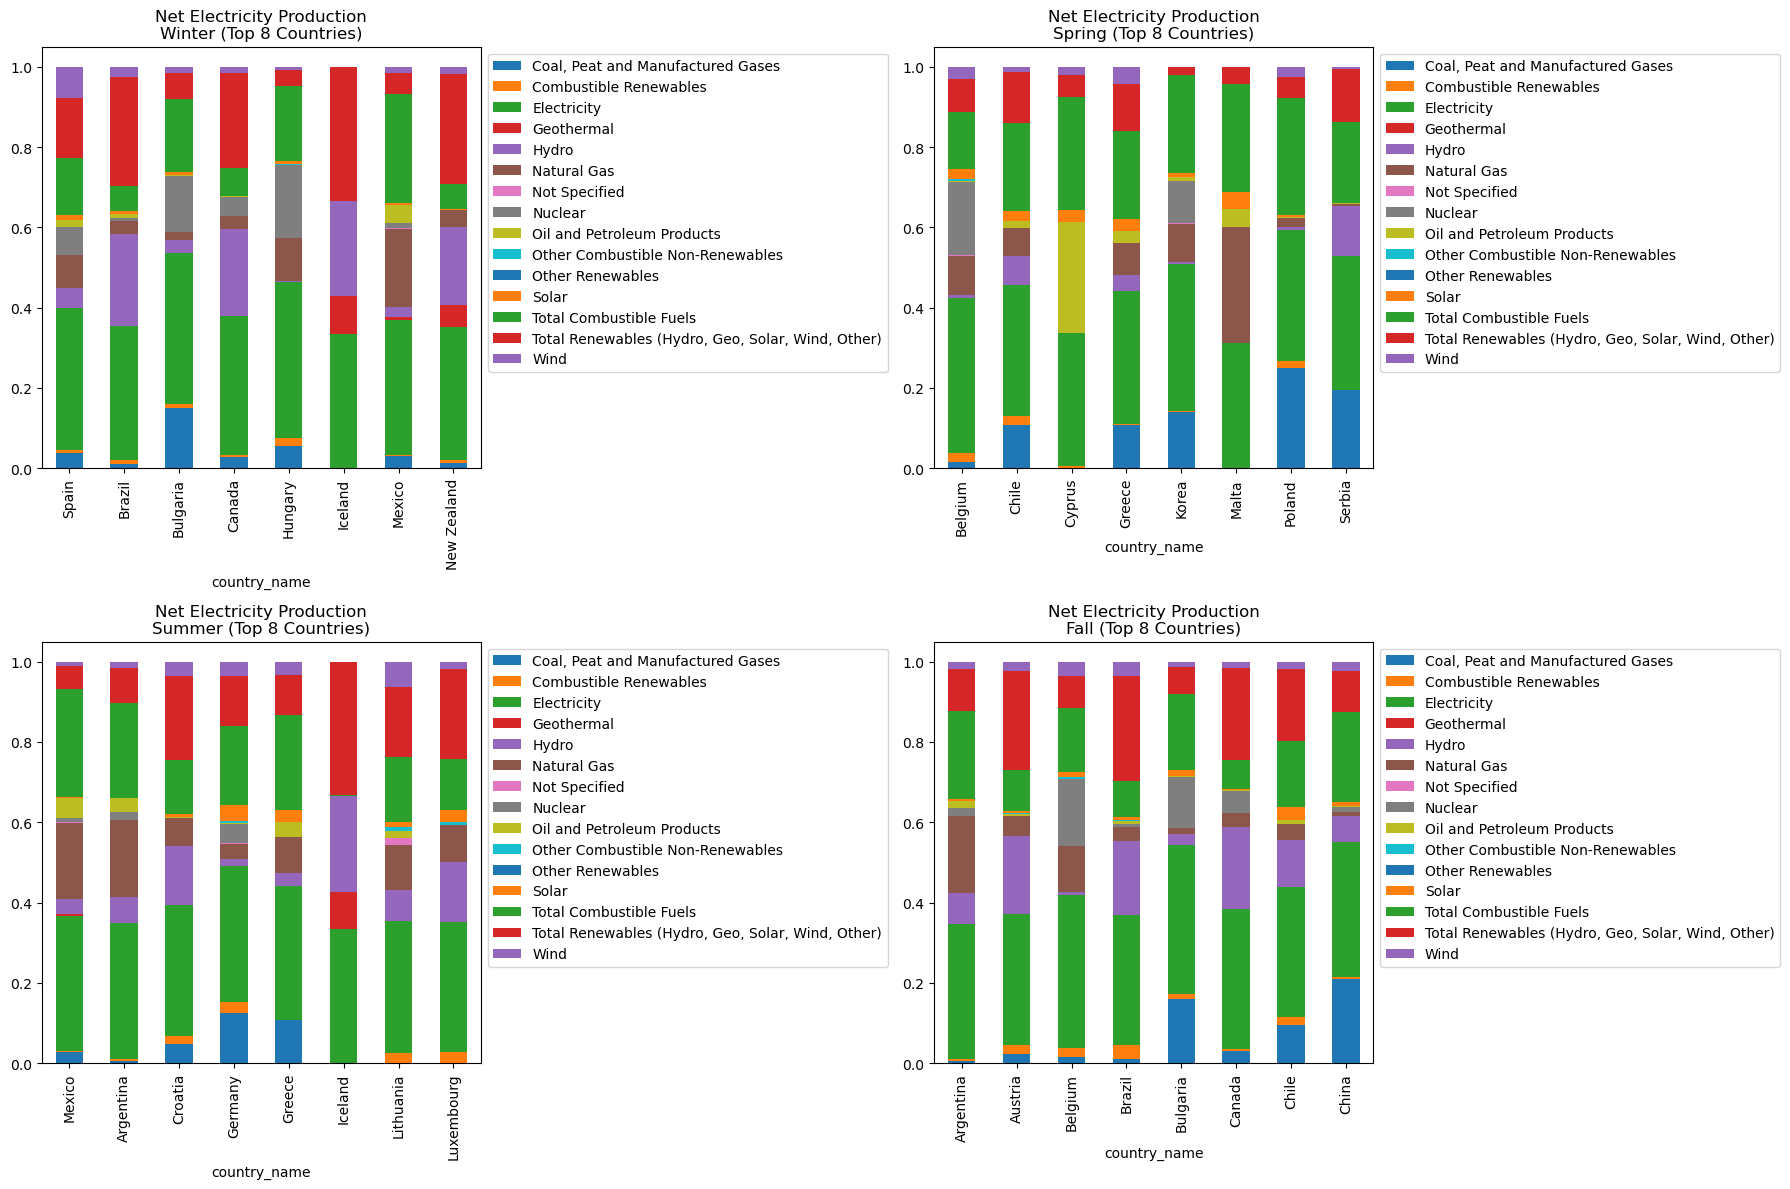

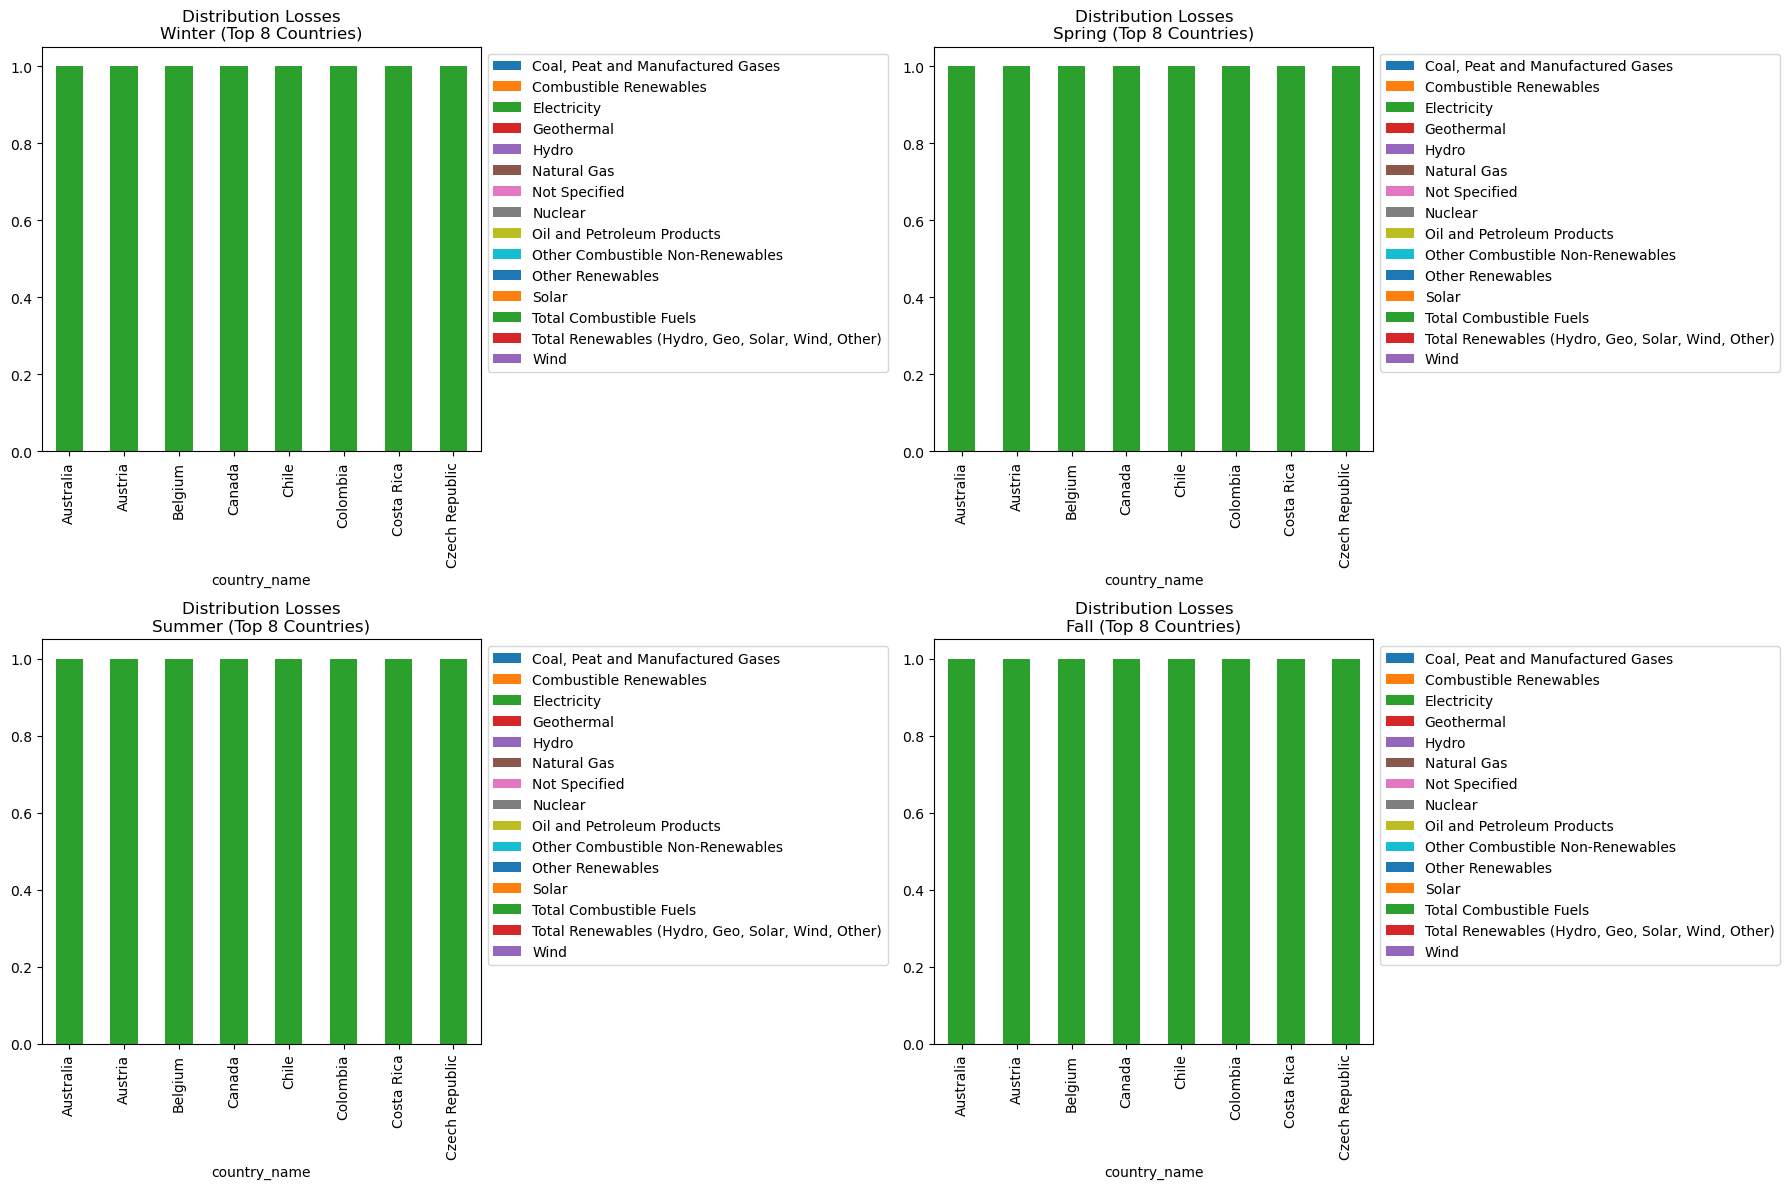

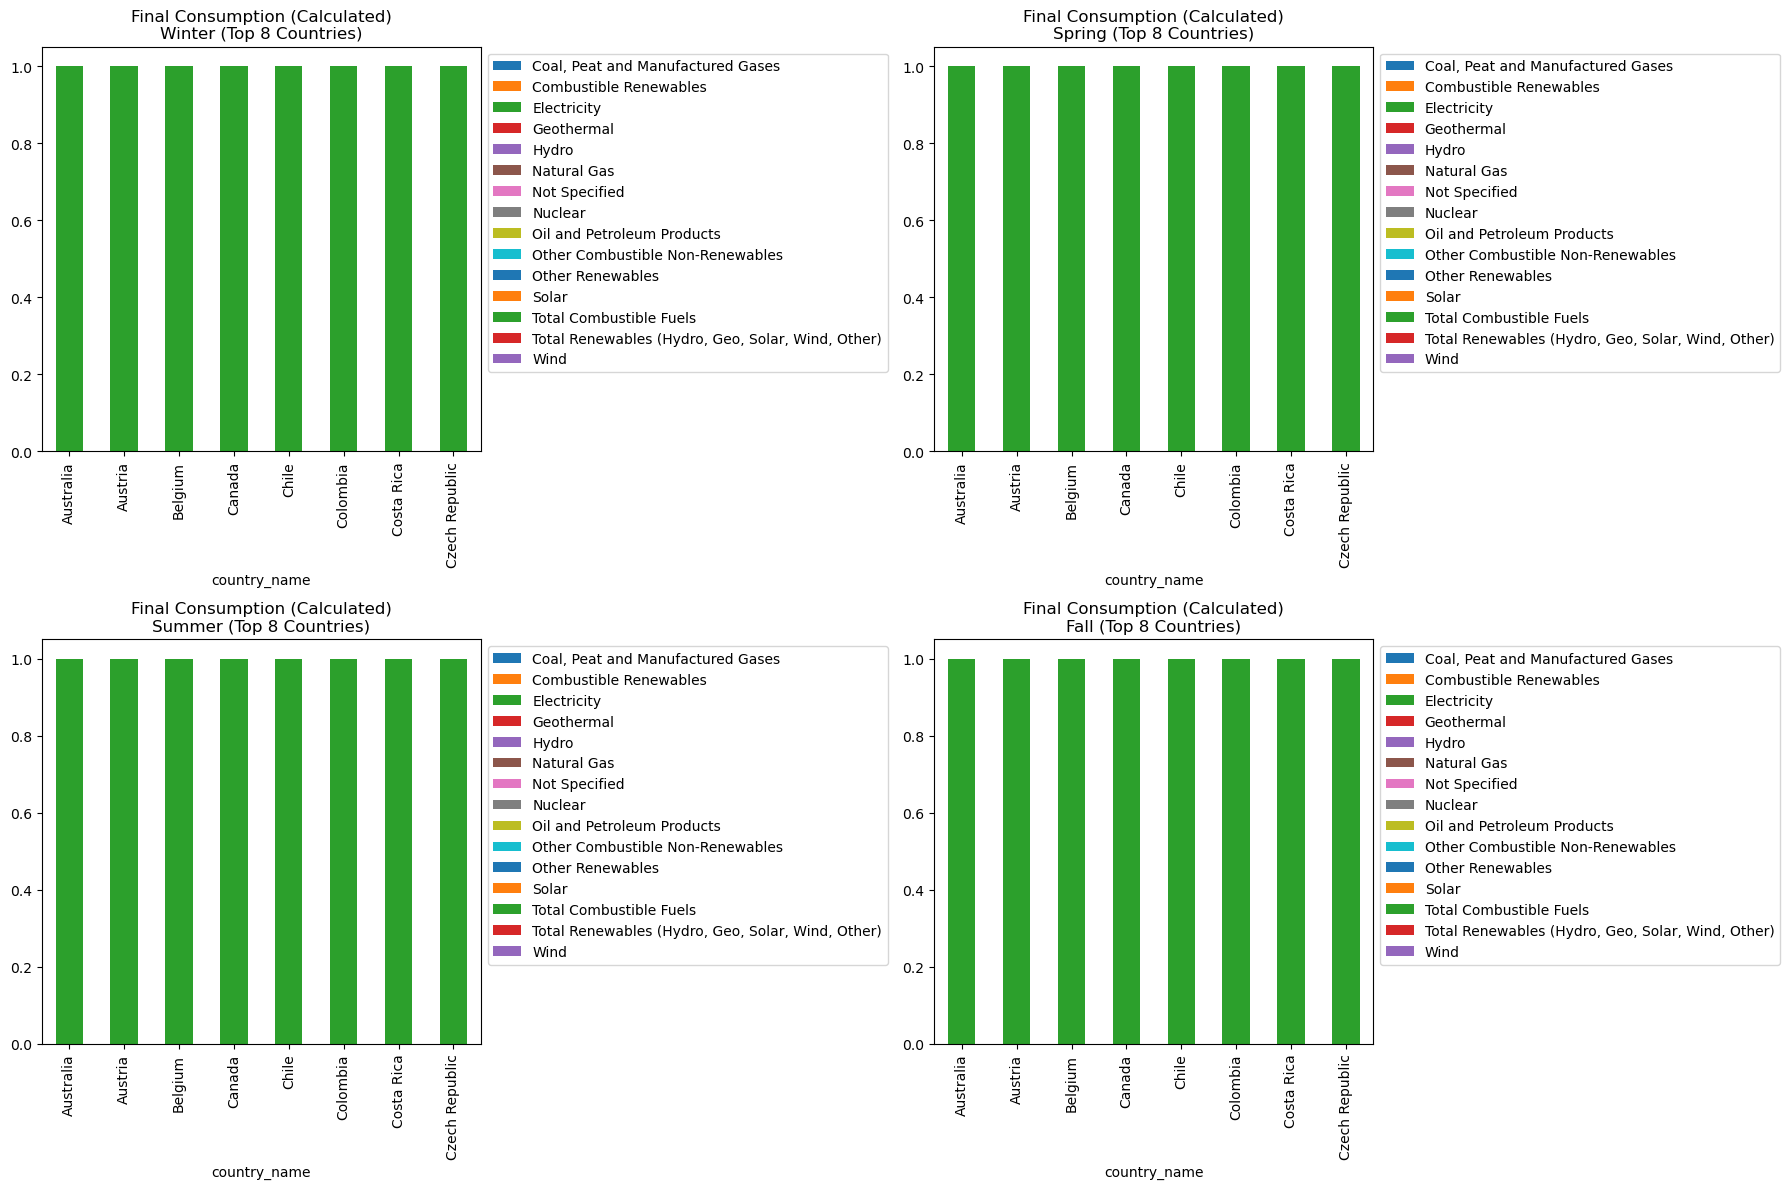

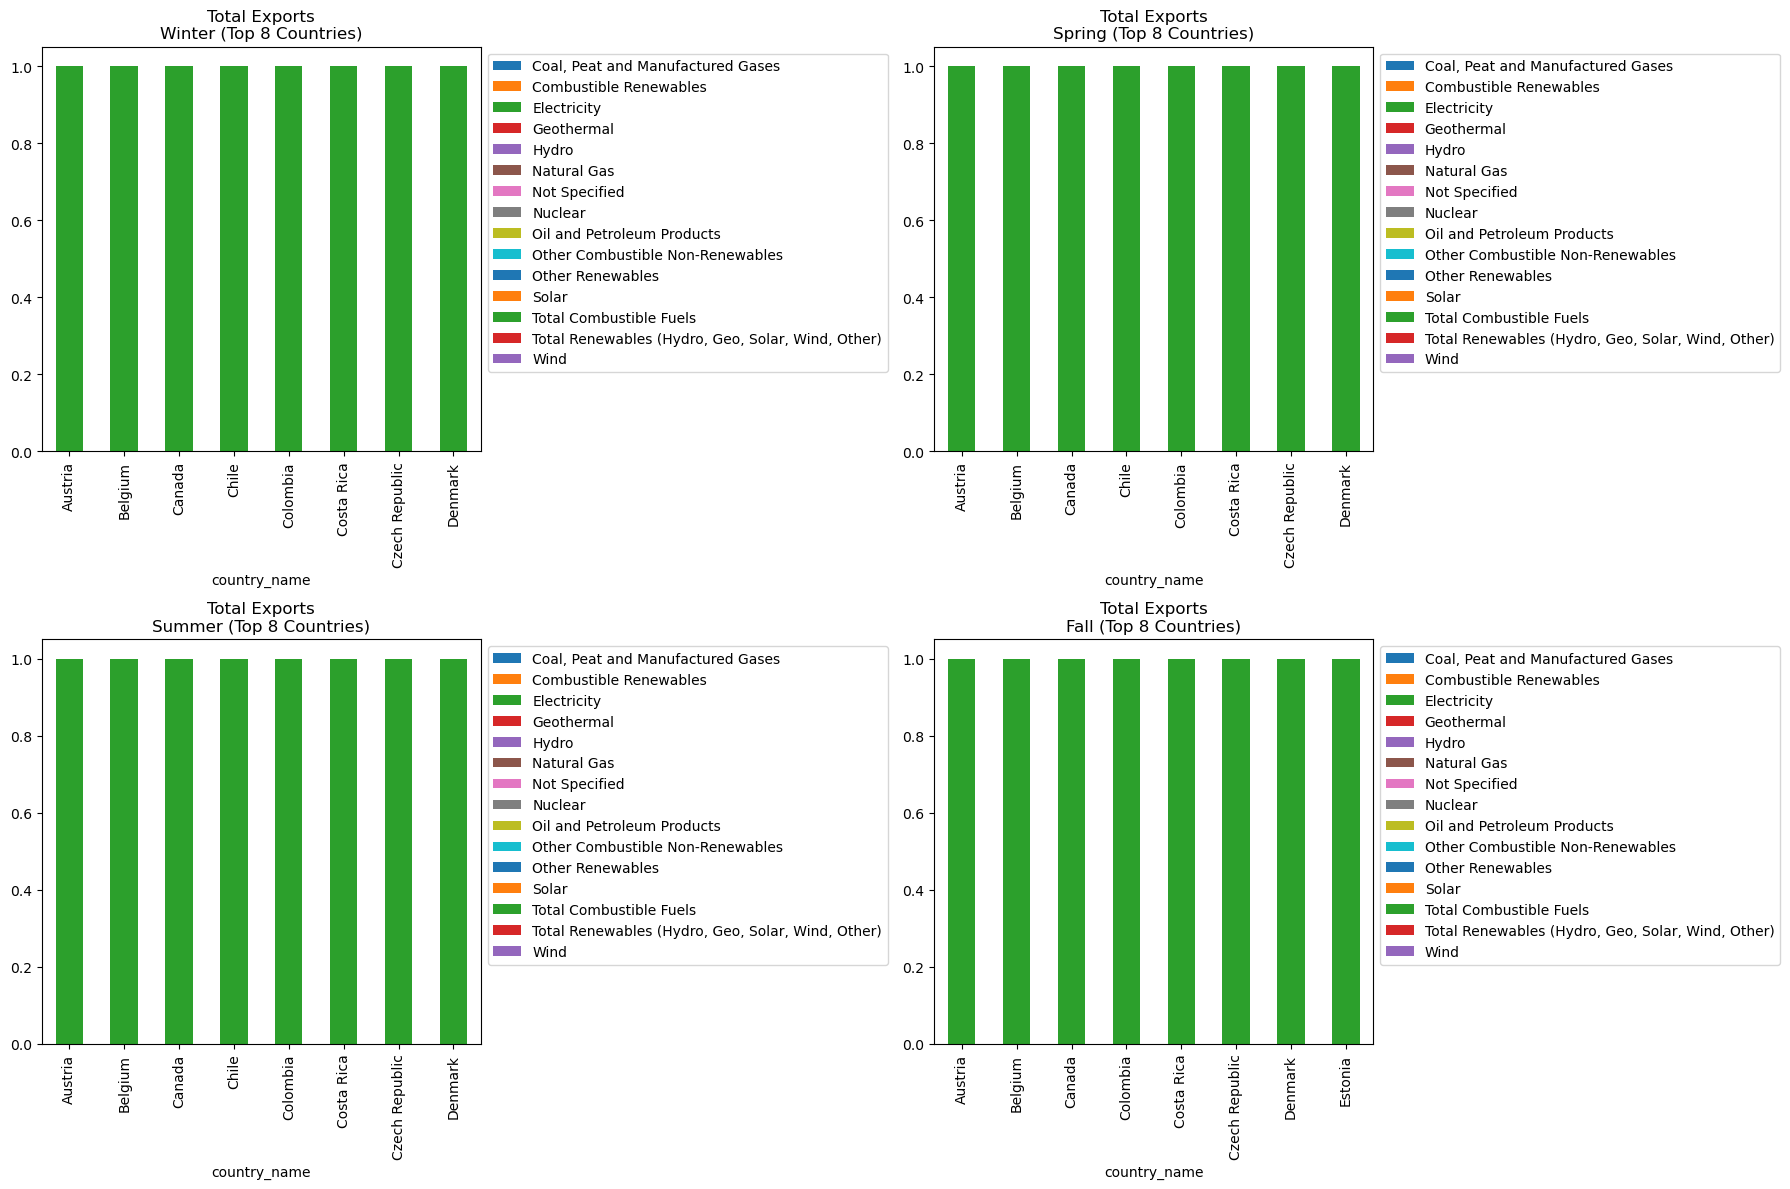

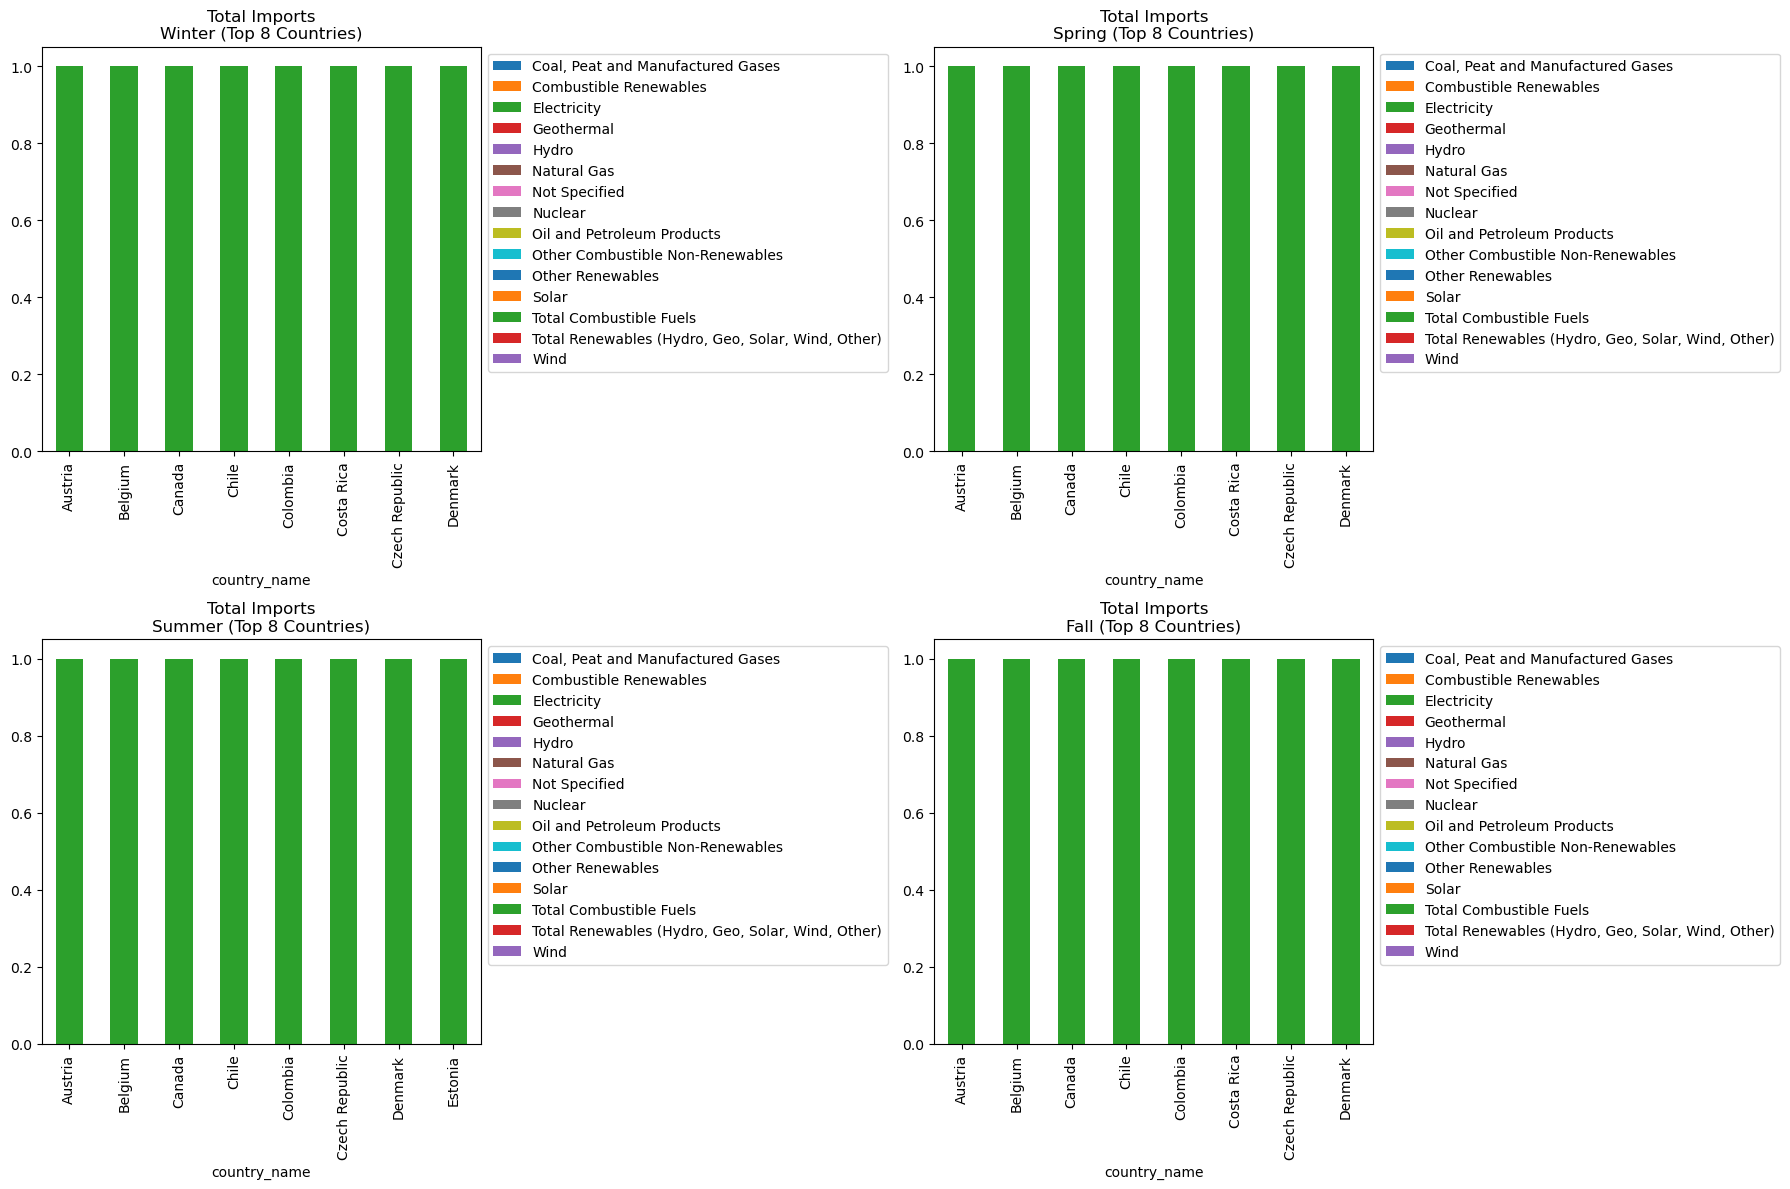

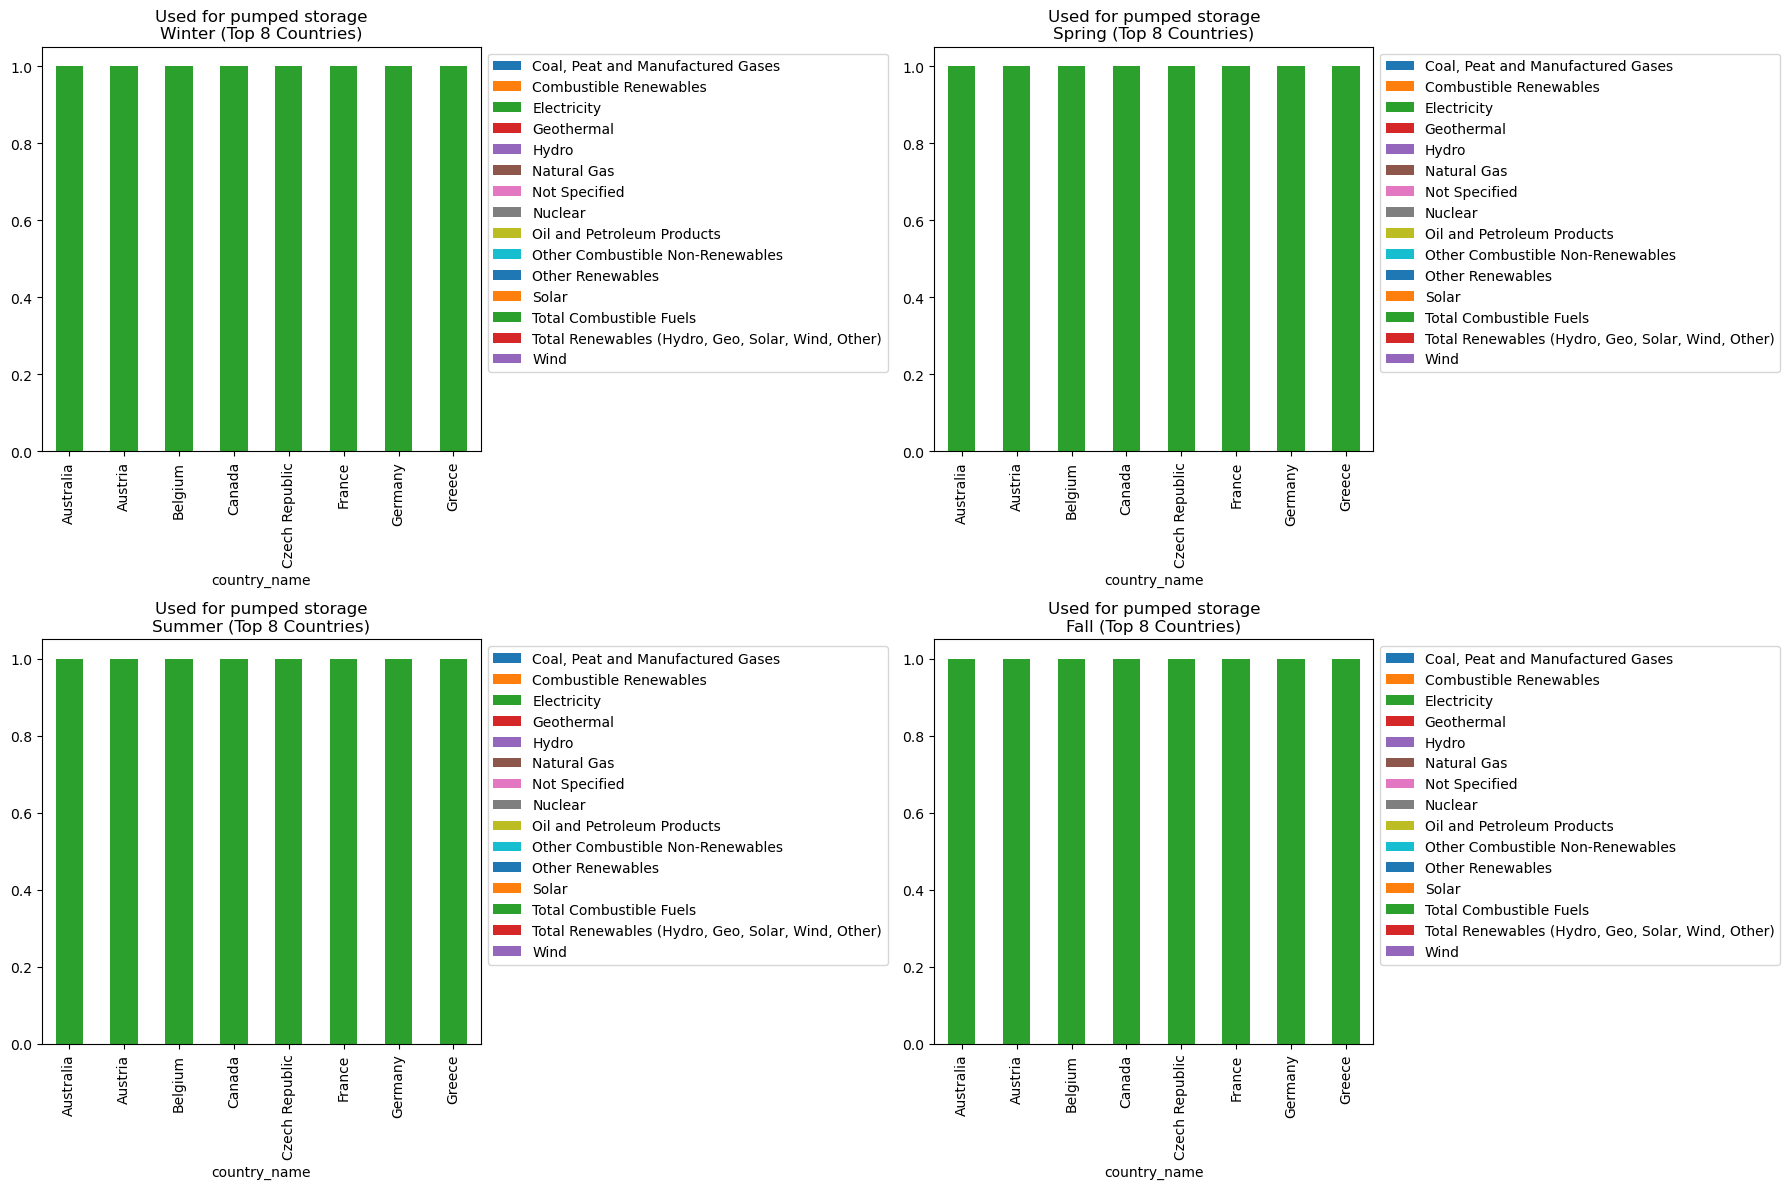

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Define seasons (Northern Hemisphere)
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

# 2. Process data for all parameters
def prepare_seasonal_data(df):
    seasonal_data = []
    for param in df['parameter'].unique():
        param_data = df[df['parameter'] == param]
        for season, months in seasons.items():
            season_df = param_data[param_data['date'].dt.month.isin(months)]
            agg_df = season_df.groupby(['country_name', 'product'])['value'].mean().unstack()
            agg_df['parameter'] = param
            agg_df['season'] = season
            seasonal_data.append(agg_df)
    return pd.concat(seasonal_data).reset_index()

seasonal_df = prepare_seasonal_data(df)

# 3. Visualization function
def plot_parameter_seasons(parameter, n_countries=8, figsize=(18, 12)):
    param_data = seasonal_df[seasonal_df['parameter'] == parameter]
    products = param_data.drop(columns=['country_name', 'parameter', 'season']).columns
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    for (season, ax) in zip(seasons.keys(), axes.flatten()):
        season_data = param_data[param_data['season'] == season]
        
        # Normalize within parameter-season for comparison
        season_data[products] = season_data[products].div(season_data[products].sum(axis=1), axis=0)
        
        # Get top countries by total consumption
        top_countries = season_data[products].sum(axis=1).nlargest(n_countries).index
        plot_data = season_data.loc[top_countries].set_index('country_name')[products]
        
        plot_data.plot(kind='bar', stacked=True, ax=ax, 
                      title=f'{parameter}\n{season} (Top {n_countries} Countries)')
        ax.legend(bbox_to_anchor=(1,1))
    plt.tight_layout()
    return fig

# 4. Generate plots for all parameters
for parameter in df['parameter'].unique():
    plot_parameter_seasons(parameter)
    plt.savefig(f'{parameter.replace("/","_")}_seasonal.png', bbox_inches='tight')

In [34]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# 1. Enhanced Data Preparation
def prepare_analysis_data(df):
    # Convert date
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    # Define Northern Hemisphere seasons (will add Southern later)
    hemispheres = {
        'Northern': {
            'Winter': [12, 1, 2],
            'Spring': [3, 4, 5], 
            'Summer': [6, 7, 8],
            'Fall': [9, 10, 11]
        }
    }
    
    # Add hemisphere column (placeholder - will need manual mapping)
    df['hemisphere'] = 'Northern'  # Temporary until we map countries
    
    # Seasonal analysis
    seasonal_data = []
    for hem, season_def in hemispheres.items():
        for season, months in season_def.items():
            mask = (df['month'].isin(months)) & (df['hemisphere'] == hem)
            seasonal_group = df[mask].groupby(['parameter', 'country_name', 'product', 'year'])['value'].mean().reset_index()
            seasonal_group['season'] = season
            seasonal_group['hemisphere'] = hem
            seasonal_data.append(seasonal_group)
    
    # Time trend analysis
    trend_data = df.groupby(['parameter', 'country_name', 'product', 'year'])['value'].mean().reset_index()
    
    return pd.concat(seasonal_data, ignore_index=True), trend_data

seasonal_df, trend_df = prepare_analysis_data(df)

# 2. Interactive Seasonal Plots
def create_seasonal_dashboard(parameter, n_countries=8):
    param_data = seasonal_df[seasonal_df['parameter'] == parameter]
    products = param_data['product'].unique()
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']  # Define seasons explicitly
    
    fig = make_subplots(rows=2, cols=2, 
                       subplot_titles=[f"<b>{season}</b>" for season in seasons],
                       horizontal_spacing=0.1, vertical_spacing=0.15)
    
    for i, season in enumerate(seasons):
        season_data = param_data[param_data['season'] == season]
        
        # Get top countries
        top_countries = season_data.groupby('country_name')['value'].sum().nlargest(n_countries).index
        
        # Normalized stacked bar
        for product in products:
            product_data = season_data[(season_data['country_name'].isin(top_countries)) & 
                                     (season_data['product'] == product)]
            fig.add_trace(
                go.Bar(
                    x=product_data['country_name'],
                    y=product_data['value'],
                    name=product,
                    legendgroup=product,
                    showlegend=(i==0)  # Only show legend for first subplot
                ),
                row=(i//2)+1, col=(i%2)+1
            )
    
    # Update layout
    fig.update_layout(
        title=f"<b>{parameter}</b> - Seasonal Patterns (Top {n_countries} Countries)",
        barmode='relative',
        height=900,
        hovermode='x unified',
        annotations=[dict(text="Normalized % contribution by product", 
                         x=0.5, y=-0.1, showarrow=False)]
    )
    return fig

# 3. Time Trend Analysis
def create_trend_analysis(parameter, countries=None):
    param_data = trend_df[trend_df['parameter'] == parameter]
    products = param_data['product'].unique()  # Define products here
    
    if not countries:
        # Default to top 5 countries by average consumption
        countries = param_data.groupby('country_name')['value'].mean().nlargest(5).index.tolist()
    
    fig = px.line(
        param_data[param_data['country_name'].isin(countries)],
        x='year', y='value',
        color='country_name',
        line_dash='product',
        facet_col='product' if len(products) <= 5 else None,
        title=f"<b>{parameter}</b> - Yearly Trends"
    )
    
    fig.update_layout(
        hovermode='x unified',
        height=600,
        xaxis_title='',
        yaxis_title='Electricity (GWh)'
    )
    return fig

# Generate all dashboards
for parameter in df['parameter'].unique():
    create_seasonal_dashboard(parameter).show()
    create_trend_analysis(parameter).show()

In [35]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Global season definitions
SEASONS = {
    'Northern': {
        'Winter': [12, 1, 2],
        'Spring': [3, 4, 5],
        'Summer': [6, 7, 8],
        'Fall': [9, 10, 11]
    },
    'Southern': {
        'Summer': [12, 1, 2],
        'Fall': [3, 4, 5],
        'Winter': [6, 7, 8],
        'Spring': [9, 10, 11]
    }
}

def prepare_data(df, hemisphere='Northern'):
    """Preprocess data and add time-related columns"""
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['hemisphere'] = hemisphere  # Will be enhanced later
    return df

def filter_data(df, years=None, seasons=None, hemisphere='Northern'):
    """Filter data based on year range and seasons"""
    df = prepare_data(df, hemisphere)
    
    # Apply year filter
    if years:
        start_year, end_year = years
        df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    
    # Apply season filter
    if seasons:
        season_months = []
        for season in seasons:
            season_months.extend(SEASONS[hemisphere][season])
        df = df[df['month'].isin(season_months)]
    
    return df

def plot_seasonal_trend(
    df, 
    parameter, 
    seasons=None, 
    years=None, 
    n_countries=8, 
    hemisphere='Northern'
):
    """
    Plot seasonal consumption patterns for top countries
    
    Args:
        df: Raw dataframe
        parameter: Electricity parameter to analyze
        seasons: List of seasons to include (None = all)
        years: Tuple (start_year, end_year) for year range
        n_countries: Number of top countries to show
        hemisphere: 'Northern' or 'Southern'
    """
    # Set default seasons if not provided
    if seasons is None:
        seasons = list(SEASONS[hemisphere].keys())
    
    # Filter data
    filtered_df = filter_data(df, years, seasons, hemisphere)
    param_df = filtered_df[filtered_df['parameter'] == parameter]
    
    # Calculate seasonal averages
    seasonal_data = []
    for season in seasons:
        season_months = SEASONS[hemisphere][season]
        season_df = param_df[param_df['month'].isin(season_months)]
        agg_df = season_df.groupby(['country_name', 'product'])['value'].mean().reset_index()
        agg_df['season'] = season
        seasonal_data.append(agg_df)
    
    seasonal_df = pd.concat(seasonal_data)
    
    # Create subplots based on number of seasons
    n_seasons = len(seasons)
    n_cols = min(2, n_seasons)
    n_rows = (n_seasons + 1) // 2
    fig = make_subplots(
        rows=n_rows, 
        cols=n_cols,
        subplot_titles=seasons,
        horizontal_spacing=0.15,
        vertical_spacing=0.1
    )
    
    # Add plots for each season
    for i, season in enumerate(seasons):
        row = (i // n_cols) + 1
        col = (i % n_cols) + 1
        
        # Get top countries for this season
        season_data = seasonal_df[seasonal_df['season'] == season]
        top_countries = season_data.groupby('country_name')['value'].sum().nlargest(n_countries).index
        
        # Create stacked bar chart
        for product in season_data['product'].unique():
            product_data = season_data[
                (season_data['country_name'].isin(top_countries)) & 
                (season_data['product'] == product)
            ]
            
            # Sort by total consumption
            country_order = product_data.groupby('country_name')['value'].sum()\
                .sort_values(ascending=False).index
            product_data['country_name'] = pd.Categorical(
                product_data['country_name'], 
                categories=country_order,
                ordered=True
            )
            product_data = product_data.sort_values('country_name')
            
            fig.add_trace(
                go.Bar(
                    x=product_data['country_name'],
                    y=product_data['value'],
                    name=product,
                    legendgroup=product,
                    showlegend=(i == 0),  # Show legend only for first subplot
                    hovertemplate=(
                        f"<b>{product}</b><br>" +
                        "Country: %{x}<br>" +
                        "Avg Consumption: %{y:,.1f} GWh<br>" +
                        "<extra></extra>"
                    )
                ),
                row=row,
                col=col
            )
    
    # Update layout
    title_years = f" ({years[0]}-{years[1]})" if years else ""
    fig.update_layout(
        title=f"<b>{parameter}</b> - Seasonal Patterns{title_years}",
        barmode="stack",
        height=400 * n_rows,
        hovermode="x unified",
        legend_title="Energy Source"
    )
    
    # Update axes
    for i in range(1, n_seasons + 1):
        fig.update_yaxes(title_text="GWh", row=i, col=1)
    
    return fig

def plot_yearly_trend(
    df, 
    parameter, 
    years=None, 
    countries=None, 
    products=None, 
    n_countries=5
):
    """
    Plot yearly consumption trends
    
    Args:
        df: Raw dataframe
        parameter: Electricity parameter to analyze
        years: Tuple (start_year, end_year) for year range
        countries: Specific countries to include (None = auto-select)
        products: Specific products to include (None = all)
        n_countries: Number of countries to show if not specified
    """
    # Filter data
    filtered_df = prepare_data(df)
    param_df = filtered_df[filtered_df['parameter'] == parameter]
    
    # Apply year filter
    if years:
        start_year, end_year = years
        param_df = param_df[
            (param_df['year'] >= start_year) & 
            (param_df['year'] <= end_year)
        ]
    
    # Apply product filter
    if products:
        param_df = param_df[param_df['product'].isin(products)]
    
    # Select countries if not specified
    if not countries:
        # Get top countries by average consumption
        top_countries = param_df.groupby('country_name')['value'].mean()\
            .nlargest(n_countries).index
        param_df = param_df[param_df['country_name'].isin(top_countries)]
    else:
        param_df = param_df[param_df['country_name'].isin(countries)]
    
    # Aggregate data
    trend_df = param_df.groupby(['year', 'country_name', 'product'])['value']\
        .mean().reset_index()
    
    # Create plot
    fig = px.line(
        trend_df,
        x='year',
        y='value',
        color='country_name',
        line_dash='product',
        facet_col='product' if len(trend_df['product'].unique()) <= 5 else None,
        labels={'value': 'Electricity (GWh)'},
        title=f"<b>{parameter}</b> - Yearly Trends"
    )
    
    # Update layout
    fig.update_layout(
        height=600,
        hovermode='x unified',
        legend_title="Country/Product",
        xaxis_title="Year"
    )
    
    # Add range slider if sufficient years
    if len(trend_df['year'].unique()) > 5:
        fig.update_xaxes(rangeslider_visible=True)
    
    return fig

In [36]:
# Analyze final consumption for 2020-2023 in Summer and Winter
fig = plot_seasonal_trend(
    df=df,
    parameter='Final Consumption (Calculated)',
    seasons=['Summer', 'Winter','Fall','Spring'],
    years=(2010, 2023),
    n_countries=10
)
fig.show()

/tmp/ipykernel_23888/702399187.py:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_23888/702399187.py:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_23888/702399187.py:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

In [37]:
# Show yearly trends for net production in top 5 countries
fig = plot_yearly_trend(
    df=df,
    parameter='Net Electricity Production',
    years=(2015, 2023),
    n_countries=5
)
fig.show()

# Specific countries and products
fig = plot_yearly_trend(
    df=df,
    parameter='Distribution Losses',
    countries=['Germany', 'France', 'Italy'],
    products=['Electricity'],
    years=(2018, 2023)
)
fig.show()

In [38]:
def add_major_production_month(df):
    """
    Adds a 'major_production_month' column indicating the peak production month for each country.
    
    Steps:
    1. Filter for Net Electricity Production (Electricity product)
    2. Group by country and month, calculating average production
    3. Find the month with max average production for each country
    4. Merge this information back into the original DataFrame
    
    Args:
        df: Original DataFrame with electricity data
        
    Returns:
        DataFrame with added 'major_production_month' column
    """
    # Create a copy to avoid modifying original
    df = df.copy()
    
    # Convert date to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])
    
    # Extract month
    df['month'] = df['date'].dt.month
    
    # Filter for relevant data (Net Electricity Production - Electricity)
    production_mask = (
        (df['parameter'] == 'Net Electricity Production') &
        (df['product'] == 'Electricity')
    )  # THIS WAS THE MISSING PARENTHESIS
    production_df = df[production_mask]
    
    # Calculate average monthly production per country
    monthly_avg = (
        production_df.groupby(['country_name', 'month'])['value']
        .mean()
        .reset_index()
    )
    
    # Find peak production month for each country
    peak_months = (
        monthly_avg.loc[monthly_avg.groupby('country_name')['value'].idxmax()]
        .rename(columns={'month': 'major_production_month'})
        [['country_name', 'major_production_month']]
    )
    
    # Merge with original data
    return df.merge(peak_months, on='country_name', how='left')

In [39]:
df = add_major_production_month(df)

In [40]:
df

,country_name,date,parameter,product,value,year,month,hemisphere,major_production_month
0,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630,2015,1,Northern,1
1,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790,2015,1,Northern,1
2,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350,2015,1,Northern,1
3,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030,2015,1,Northern,1
4,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380,2015,1,Northern,1
...,...,...,...,...,...,...,...,...,...
121055,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827,2023,8,Northern,7
121056,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621,2023,9,Northern,7
121057,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564,2023,10,Northern,7
121058,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819,2023,11,Northern,7


In [41]:
def visualize_production_patterns(df, country):
    """
    Visualize monthly production patterns for a specific country
    to verify the major production month
    """
    # Filter and aggregate data
    country_data = df[
        (df['country_name'] == country) &
        (df['parameter'] == 'Net Electricity Production') &
        (df['product'] == 'Electricity')
    ]
    monthly_avg = country_data.groupby('month')['value'].mean().reset_index()
    
    # Create plot
    fig = px.bar(
        monthly_avg, 
        x='month', 
        y='value',
        title=f"Monthly Production Pattern: {country}",
        labels={'value': 'Avg Production (GWh)', 'month': 'Month'}
    )
    
    # Highlight peak month
    peak_month = country_data['major_production_month'].iloc[0]
    fig.add_vline(
        x=peak_month - 0.5, 
        line_width=3, 
        line_dash="dash", 
        line_color="red",
        annotation_text=f"Peak: Month {peak_month}", 
        annotation_position="top left"
    )
    
    fig.update_xaxes(tickvals=list(range(1, 13)))
    fig.show()

# Example usage
visualize_production_patterns(df, 'Germany')

In [42]:
# Add season based on major production month
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df['production_season'] = df['major_production_month'].map(season_map)

In [43]:
df

,country_name,date,parameter,product,value,year,month,hemisphere,major_production_month,production_season
0,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630,2015,1,Northern,1,Winter
1,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790,2015,1,Northern,1,Winter
2,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350,2015,1,Northern,1,Winter
3,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030,2015,1,Northern,1,Winter
4,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380,2015,1,Northern,1,Winter
...,...,...,...,...,...,...,...,...,...,...
121055,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827,2023,8,Northern,7,Summer
121056,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621,2023,9,Northern,7,Summer
121057,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564,2023,10,Northern,7,Summer
121058,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819,2023,11,Northern,7,Summer


In [44]:
def add_production_features(df):
    """
    Adds three new features to the DataFrame:
    1. major_production_month - Month with highest average production
    2. peak_ratio - How much higher peak is vs country's average
    3. peak_consistency - Percentage of years with same peak month
    
    Args:
        df: Original electricity data DataFrame
        
    Returns:
        DataFrame with added features
    """
    # Create working copy
    df = df.copy()
    
    # Ensure proper datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])
    
    # Extract time components
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    # Filter for relevant data
    production_mask = (
        (df['parameter'] == 'Net Electricity Production') & 
        (df['product'] == 'Electricity')
    )
    production_df = df[production_mask]
    
    # FEATURE 1: Major Production Month (average across all years)
    monthly_avg = (
        production_df.groupby(['country_name', 'month'])['value']
        .mean()
        .reset_index()
    )
    
    peak_months = (
        monthly_avg.loc[monthly_avg.groupby('country_name')['value'].idxmax()]
        .rename(columns={'month': 'major_production_month'})
        [['country_name', 'major_production_month']]
    )
    
    # FEATURE 2: Peak Magnitude Indicator
    country_avg = production_df.groupby('country_name')['value'].mean().rename('country_avg')
    peak_values = (
        monthly_avg.loc[monthly_avg.groupby('country_name')['value'].idxmax()]
        .set_index('country_name')['value']
        .rename('peak_value')
    )
    peak_ratio = (peak_values / country_avg).rename('peak_ratio')
    
    # FEATURE 3: Peak Consistency Metric
    yearly_peaks = (
        production_df.groupby(['country_name', 'year', 'month'])['value']
        .mean()
        .reset_index()
        .loc[lambda x: x.groupby(['country_name', 'year'])['value'].idxmax()]
        [['country_name', 'year', 'month']]
    )
    
    consistency = (
        yearly_peaks.groupby('country_name')['month']
        .apply(lambda x: x.value_counts().max() / len(x))
        .rename('peak_consistency')
    )
    
    # Merge all features
    features = peak_months.merge(
        peak_ratio, on='country_name'
    ).merge(
        consistency, on='country_name'
    )
    
    return df.merge(features, on='country_name', how='left')

# Usage
df = add_production_features(df)



In [45]:
# Verify new features
print(df[['country_name', 'major_production_month_x', 'peak_ratio', 'peak_consistency']]
      .drop_duplicates('country_name')
      .head(10))

country_name  major_production_month_x  peak_ratio  peak_consistency
0        Argentina                         1    1.120379          0.444444
1462     Australia                         1    1.091693          0.642857
4080       Austria                         5    1.088215          0.428571
7200       Belgium                         1    1.144590          0.500000
10320       Brazil                        10    1.051296          0.444444
11868     Bulgaria                         1    1.196301          0.777778
13306       Canada                         1    1.202174          0.857143
16510        Chile                        12    1.038852          0.285714
18999        China                         8    1.142535          0.555556
20595     Colombia                        10    1.033053          0.500000

In [46]:
df = df.drop(columns=['major_production_month_y']).rename(columns={'major_production_month_x': 'major_production_month'})

In [47]:
df

,country_name,date,parameter,product,value,year,month,hemisphere,major_production_month,production_season,peak_ratio,peak_consistency
0,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630,2015,1,Northern,1,Winter,1.120379,0.444444
1,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790,2015,1,Northern,1,Winter,1.120379,0.444444
2,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350,2015,1,Northern,1,Winter,1.120379,0.444444
3,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030,2015,1,Northern,1,Winter,1.120379,0.444444
4,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380,2015,1,Northern,1,Winter,1.120379,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...
121055,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827,2023,8,Northern,7,Summer,1.197987,0.928571
121056,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621,2023,9,Northern,7,Summer,1.197987,0.928571
121057,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564,2023,10,Northern,7,Summer,1.197987,0.928571
121058,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819,2023,11,Northern,7,Summer,1.197987,0.928571


In [48]:
# Drop columns: 'major_production_month_x', 'peak_ratio_x' and 4 other columns
#df = df.drop(columns=['major_production_month_x', 'peak_ratio_x', 'peak_consistency_x', 'major_production_month_y', 'peak_ratio_y', 'peak_consistency_y'])

In [49]:
df

,country_name,date,parameter,product,value,year,month,hemisphere,major_production_month,production_season,peak_ratio,peak_consistency
0,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630,2015,1,Northern,1,Winter,1.120379,0.444444
1,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790,2015,1,Northern,1,Winter,1.120379,0.444444
2,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350,2015,1,Northern,1,Winter,1.120379,0.444444
3,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030,2015,1,Northern,1,Winter,1.120379,0.444444
4,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380,2015,1,Northern,1,Winter,1.120379,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...
121055,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827,2023,8,Northern,7,Summer,1.197987,0.928571
121056,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621,2023,9,Northern,7,Summer,1.197987,0.928571
121057,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564,2023,10,Northern,7,Summer,1.197987,0.928571
121058,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819,2023,11,Northern,7,Summer,1.197987,0.928571


In [ ]:

#TODO: classify countries about hemisphere DONE
#TODO: see if we can make more plots
#TODO: add 3 columns: at war and with_who, and continent
#TODO: Build the model
#TODO: Fill the project

In [51]:
df["country_name"].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [52]:
df.columns

Index(['country_name', 'date', 'parameter', 'product', 'value', 'year',
       'month', 'hemisphere', 'major_production_month', 'production_season',
       'peak_ratio', 'peak_consistency'],
      dtype='object')

In [53]:
def classify_hemisphere(df):
    """
    Classify countries in the DataFrame as Northern or Southern Hemisphere
    and update the 'hemisphere' column.

    Args:
        df (pd.DataFrame): DataFrame with 'country_name' and 'hemisphere' columns.
    
    Returns:
        pd.DataFrame: DataFrame with updated 'hemisphere' column.
    """
    # Define hemisphere mapping
    hemisphere_mapping = {
        'Argentina': 'Southern',
        'Australia': 'Southern',
        'Austria': 'Northern',
        'Belgium': 'Northern',
        'Brazil': 'Southern',
        'Bulgaria': 'Northern',
        'Canada': 'Northern',
        'Chile': 'Southern',
        'China': 'Northern',
        'Colombia': 'Northern',
        'Costa Rica': 'Northern',
        'Croatia': 'Northern',
        'Cyprus': 'Northern',
        'Czech Republic': 'Northern',
        'Denmark': 'Northern',
        'Estonia': 'Northern',
        'Finland': 'Northern',
        'France': 'Northern',
        'Germany': 'Northern',
        'Greece': 'Northern',
        'Hungary': 'Northern',
        'Iceland': 'Northern',
        'India': 'Northern',
        'Ireland': 'Northern',
        'Italy': 'Northern',
        'Japan': 'Northern',
        'Korea': 'Northern',
        'Latvia': 'Northern',
        'Lithuania': 'Northern',
        'Luxembourg': 'Northern',
        'Malta': 'Northern',
        'Mexico': 'Northern',
        'Netherlands': 'Northern',
        'New Zealand': 'Southern',
        'North Macedonia': 'Northern',
        'Norway': 'Northern',
        'Peru': 'Southern',
        'Poland': 'Northern',
        'Portugal': 'Northern',
        'Serbia': 'Northern',
        'Slovak Republic': 'Northern',
        'Slovenia': 'Northern',
        'Spain': 'Northern',
        'Sweden': 'Northern',
        'Switzerland': 'Northern',
        'Turkey': 'Northern',
        'United Kingdom': 'Northern',
        'United States': 'Northern'
    }
    
    # Verify all countries in df are in the mapping
    unique_countries = df['country_name'].unique()
    missing_countries = [country for country in unique_countries if country not in hemisphere_mapping]
    if missing_countries:
        raise ValueError(f"Countries not in hemisphere mapping: {missing_countries}")
    
    # Update hemisphere column
    df['hemisphere'] = df['country_name'].map(hemisphere_mapping)
    
    return df

In [54]:
df = classify_hemisphere(df)

In [55]:
print(df.head(30))

country_name       date                   parameter  \
0     Argentina 2015-01-01  Net Electricity Production   
1     Argentina 2015-01-01  Net Electricity Production   
2     Argentina 2015-01-01  Net Electricity Production   
3     Argentina 2015-01-01  Net Electricity Production   
4     Argentina 2015-01-01  Net Electricity Production   
5     Argentina 2015-01-01  Net Electricity Production   
6     Argentina 2015-01-01  Net Electricity Production   
7     Argentina 2015-01-01  Net Electricity Production   
8     Argentina 2015-01-01  Net Electricity Production   
9     Argentina 2015-01-01  Net Electricity Production   
10    Argentina 2015-01-01  Net Electricity Production   
11    Argentina 2015-01-01  Net Electricity Production   
12    Argentina 2015-01-01  Net Electricity Production   
13    Argentina 2015-01-01  Net Electricity Production   
14    Argentina 2015-02-01  Net Electricity Production   
15    Argentina 2015-02-01  Net Electricity Production   
16    Argentina 2015-02-01  Net Electricity Production   
17    Argentina 2015-02-01  Net Electricity Production   
18    Argentina 2015-02-01  Net Electricity Production   
19    Argentina 2015-02-01  Net Electricity Production   
20    Argentina 2015-02-01  Net Electricity Production   
21    Argentina 2015-02-01  Net Electricity Production   
22    Argentina 2015-02-01  Net Electricity Production   
23    Argentina 2015-02-01  Net Electricity Production   
24    Argentina 2015-02-01  Net Electricity Production   
25    Argentina 2015-02-01  Net Electricity Production   
26    Argentina 2015-02-01  Net Electricity Production   
27    Argentina 2015-02-01  Net Electricity Production   
28    Argentina 2015-03-01  Net Electricity Production   
29    Argentina 2015-03-01  Net Electricity Production   

                                              product      value  year  month  \
0                                         Electricity  12007.063  2015      1   
1                                             Nuclear    559.079  2015      1   
2                             Total Combustible Fuels   8875.235  2015      1   
3                   Coal, Peat and Manufactured Gases    195.203  2015      1   
4                          Oil and Petroleum Products   1856.738  2015      1   
5                                         Natural Gas   6767.060  2015      1   
6                              Combustible Renewables     56.234  2015      1   
7                    Other Combustible Non-Renewables      0.000  2015      1   
8                                               Hydro   2519.945  2015      1   
9                                                Wind     51.294  2015      1   
10                                              Solar      1.511  2015      1   
11                                         Geothermal      0.000  2015      1   
12                                   Other Renewables      0.000  2015      1   
13  Total Renewables (Hydro, Geo, Solar, Wind, Other)   2628.984  2015      1   
14                                        Electricity  11283.226  2015      2   
15                                            Nuclear    610.064  2015      2   
16                            Total Combustible Fuels   8597.118  2015      2   
17                  Coal, Peat and Manufactured Gases    203.211  2015      2   
18                         Oil and Petroleum Products   1670.965  2015      2   
19                                        Natural Gas   6673.424  2015      2   
20                             Combustible Renewables     49.518  2015      2   
21                   Other Combustible Non-Renewables      0.000  2015      2   
22                                              Hydro   2032.279  2015      2   
23                                               Wind     42.504  2015      2   
24                                              Solar      1.262  2015      2   
25                                         Geothermal      0.000  2015      2   
26               

In [56]:
df['country_name'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [57]:

# Industrial Production Index 
# Energy Prices


In [58]:
df.to_csv(r"../data/processed/model_ready.csv")

In [59]:
# ---------------------------------------------
# Required Libraries
import pandas as pd
import requests
from functools import lru_cache
from tqdm import tqdm
import pycountry
import time

# ---------------------------------------------
# Function: Convert country name to ISO-2 code
def name_to_iso2(name: str) -> str | None:
    try:
        return pycountry.countries.lookup(name).alpha_2.lower()
    except LookupError:
        manual = {
            "Czech Republic": "cz",
            "Czechia": "cz",
            "Slovak Republic": "sk",
            "Korea": "kr",
            "Korea, Rep.": "kr",
            "Turkey": "tr",
            "Türkiye": "tr",
            "United States": "us",
        }
        return manual.get(name)

# ---------------------------------------------
# Function: Fetch a specific World Bank indicator series for a country
@lru_cache(maxsize=None)
def fetch_indicator_series(iso: str, indicator: str,
                           start=1990, end=2025) -> dict:
    url = (f"https://api.worldbank.org/v2/country/{iso}/indicator/{indicator}"
           f"?format=json&per_page=20000&date={start}:{end}")
    response = requests.get(url, timeout=20)
    response.raise_for_status()
    data = response.json()[1]
    return {int(item["date"]): item["value"] for item in data if item["value"] is not None}


df["year"] = pd.to_datetime(df["date"]).dt.year

# Prepare empty lists for GDP and GDP per capita
gdp_values = []
gdp_per_capita_values = []

# Caches to avoid redundant API requests
cache_gdp = {}
cache_gdp_pc = {}

print("⏬ Fetching GDP and GDP per capita from World Bank API...")

for _, row in tqdm(df.iterrows(), total=len(df)):
    country = row["country_name"]
    year = row["year"]
    iso = name_to_iso2(country)

    # If ISO code not found, leave values as None
    if iso is None:
        gdp_values.append(None)
        gdp_per_capita_values.append(None)
        continue

    # Fetch data if not already cached
    if iso not in cache_gdp:
        try:
            cache_gdp[iso] = fetch_indicator_series(iso, "NY.GDP.MKTP.CD")
            cache_gdp_pc[iso] = fetch_indicator_series(iso, "NY.GDP.PCAP.CD")
            time.sleep(0.15)  # Avoid API rate limit
        except Exception as e:
            print(f"⚠️ Error fetching data for {iso}: {e}")
            cache_gdp[iso] = {}
            cache_gdp_pc[iso] = {}

    # Append values or None
    gdp_values.append(cache_gdp[iso].get(year))
    gdp_per_capita_values.append(cache_gdp_pc[iso].get(year))

# ---------------------------------------------
# Add the new columns to your DataFrame
df["GDP"] = gdp_values
df["GDP_per_capita"] = gdp_per_capita_values

# Save to new file


# Print missing values summary
# missing_gdp_pct = df["GDP"].isna().mean() * 100
# missing_gdp_pc_pct = df["GDP_per_capita"].isna().mean() * 100

# print("\n✅ Done! File saved as: electricity_with_GDP_and_capita.csv")
# print(f"   Missing GDP values: {missing_gdp_pct:.2f}%")
# print(f"   Missing GDP per capita values: {missing_gdp_pc_pct:.2f}%")


⏬ Fetching GDP and GDP per capita from World Bank API...

100%|██████████| 121060/121060 [01:15<00:00, 1611.40it/s]


In [60]:
df

,country_name,date,parameter,product,value,year,month,hemisphere,major_production_month,production_season,peak_ratio,peak_consistency,GDP,GDP_per_capita
0,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498
1,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498
2,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498
3,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498
4,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121055,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827,2023,8,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82304.620427
121056,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621,2023,9,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82304.620427
121057,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564,2023,10,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82304.620427
121058,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819,2023,11,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82304.620427


In [61]:
df['country_name'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np # Only used for the dummy data creation below


# In a real scenario, this would come from your external source
all_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
                          'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
                          'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
                          'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
                          'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
                          'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
                          'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Poland',
                          'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
                          'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
                          'United States'])

temp_data_list = []
for country in all_countries:
    for year in range(2010, 2024): # From 2010 to 2023
        for month in range(1, 13):
            # Generate a plausible but random temperature for demonstration
            # You'd replace this with your actual fetched data
            if 'Northern' in df[df['country_name'] == country]['hemisphere'].iloc[0] if country in df['country_name'].unique() else True: # simplistic check for hemisphere
                 # Simulate Northern Hemisphere: warmer in summer (6-8), colder in winter (12-2)
                if month in [6, 7, 8]:
                    temp = np.random.uniform(18, 30)
                elif month in [12, 1, 2]:
                    temp = np.random.uniform(-5, 10)
                else:
                    temp = np.random.uniform(5, 20)
            else: # Southern Hemisphere: warmer in summer (12-2), colder in winter (6-8)
                if month in [12, 1, 2]:
                    temp = np.random.uniform(18, 30)
                elif month in [6, 7, 8]:
                    temp = np.random.uniform(0, 15)
                else:
                    temp = np.random.uniform(10, 25)

            temp_data_list.append({
                'country_name': country,
                'year': year,
                'month': month,
                'Monthly Temperature Averages': round(temp, 2)
            })

monthly_temp_df = pd.DataFrame(temp_data_list)
# --- End of Dummy Data Creation ---

# Merge the temperature data with your main DataFrame
# We'll merge on 'country_name', 'year', and 'month'
df = pd.merge(df, monthly_temp_df, on=['country_name', 'year', 'month'], how='left')

print("DataFrame after adding 'Monthly Temperature Averages':")
print(df.head())
print(f"\nNumber of records in the updated DataFrame: {len(df)}")
print(f"Unique countries in the updated DataFrame: {df['country_name'].nunique()}")
print(f"First few rows of the updated DataFrame:\n{df.head()}")

DataFrame after adding 'Monthly Temperature Averages':

country_name       date                   parameter  \
0    Argentina 2015-01-01  Net Electricity Production   
1    Argentina 2015-01-01  Net Electricity Production   
2    Argentina 2015-01-01  Net Electricity Production   
3    Argentina 2015-01-01  Net Electricity Production   
4    Argentina 2015-01-01  Net Electricity Production   

                             product      value  year  month hemisphere  \
0                        Electricity  12007.063  2015      1   Southern   
1                            Nuclear    559.079  2015      1   Southern   
2            Total Combustible Fuels   8875.235  2015      1   Southern   
3  Coal, Peat and Manufactured Gases    195.203  2015      1   Southern   
4         Oil and Petroleum Products   1856.738  2015      1   Southern   

   major_production_month production_season  peak_ratio  peak_consistency  \
0                       1            Winter    1.120379          0.444444   
1                       1            Winter    1.120379          0.444444   
2                       1            Winter    1.120379          0.444444   
3                       1            Winter    1.120379          0.444444   
4                       1            Winter    1.120379          0.444444   

            GDP  GDP_per_capita  Monthly Temperature Averages  
0  5.947493e+11    13679.626498                         28.95  
1  5.947493e+11    13679.626498                         28.95  
2  5.947493e+11    13679.626498                         28.95  
3  5.947493e+11    13679.626498                         28.95  
4  5.947493e+11    13679.626498                         28.95

Number of records in the updated DataFrame: 121060

Unique countries in the updated DataFrame: 48

First few rows of the updated DataFrame:
  country_name       date                   parameter  \
0    Argentina 2015-01-01  Net Electricity Production   
1    Argentina 2015-01-01  Net Electricity Production   
2    Argentina 2015-01-01  Net Electricity Production   
3    Argentina 2015-01-01  Net Electricity Production   
4    Argentina 2015-01-01  Net Electricity Production   

                             product      value  year  month hemisphere  \
0                        Electricity  12007.063  2015      1   Southern   
1                            Nuclear    559.079  2015      1   Southern   
2            Total Combustible Fuels   8875.235  2015      1   Southern   
3  Coal, Peat and Manufactured Gases    195.203  2015      1   Southern   
4         Oil and Petroleum Products   1856.738  2015      1   Southern   

   major_production_month production_season  peak_ratio  peak_consistency  \
0                       1            Winter    1.120379          0.444444   
1                       1            Winter    1.120379          0.444444   
2                       1            Winter    1.120379          0.444444   
3                       1            Winter    1.120379          0.444444   
4                       1            Winter    1.120379          0.444444   

            GDP  GDP_per_capita  Monthly Temperature Averages  
0  5.947493e+11    13679.626498                         28.95  
1  5.947493e+11    13679.626498                         28.95  
2  5.947493e+11    13679.626498                         28.95  
3  5.947493e+11    13679.626498                         28.95  
4  5.947493e+11    13679.626498                         28.95

In [63]:
df

,country_name,date,parameter,product,value,year,month,hemisphere,major_production_month,production_season,peak_ratio,peak_consistency,GDP,GDP_per_capita,Monthly Temperature Averages
0,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,28.95
1,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,28.95
2,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,28.95
3,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,28.95
4,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,28.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121055,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827,2023,8,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82304.620427,21.30
121056,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621,2023,9,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82304.620427,16.83
121057,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564,2023,10,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82304.620427,9.54
121058,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819,2023,11,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82304.620427,11.40


In [ ]:
country_latitudes = {
    'Argentina': -34.6, # Buenos Aires
    'Australia': -35.3, # Canberra
    'Austria': 48.2,    # Vienna
    'Belgium': 50.8,    # Brussels
    'Brazil': -15.8,    # Brasilia
    'Bulgaria': 42.7,   # Sofia
    'Canada': 45.4,     # Ottawa (large country, this is an approximation)
    'Chile': -33.4,     # Santiago
    'China': 39.9,      # Beijing (large country, approximation)
    'Colombia': 4.7,    # Bogota
    'Costa Rica': 9.9,  # San Jose
    'Croatia': 45.8,    # Zagreb
    'Cyprus': 35.1,     # Nicosia
    'Czech Republic': 50.1, # Prague
    'Denmark': 55.7,    # Copenhagen
    'Estonia': 59.4,    # Tallinn
    'Finland': 60.2,    # Helsinki
    'France': 48.8,     # Paris
    'Germany': 52.5,    # Berlin
    'Greece': 37.9,     # Athens
    'Hungary': 47.5,    # Budapest
    'Iceland': 64.1,    # Reykjavik
    'India': 28.6,      # New Delhi (large country, approximation)
    'Ireland': 53.3,    # Dublin
    'Italy': 41.9,      # Rome
    'Japan': 35.7,      # Tokyo
    'Korea': 37.5,      # Seoul (assuming South Korea)
    'Latvia': 56.9,     # Riga
    'Lithuania': 54.7,  # Vilnius
    'Luxembourg': 49.6, # Luxembourg City
    'Malta': 35.9,      # Valletta
    'Mexico': 19.4,     # Mexico City
    'Netherlands': 52.4, # Amsterdam
    'New Zealand': -41.3, # Wellington
    'North Macedonia': 42.0, # Skopje
    'Norway': 59.9,     # Oslo
    'Peru': -12.0,      # Lima
    'Poland': 52.2,     # Warsaw
    'Portugal': 38.7,   # Lisbon
    'Serbia': 44.8,     # Belgrade
    'Slovak Republic': 48.1, # Bratislava
    'Slovenia': 46.1,   # Ljubljana
    'Spain': 40.4,      # Madrid
    'Sweden': 59.3,     # Stockholm
    'Switzerland': 46.9, # Bern
    'Turkey': 39.9,     # Ankara
    'United Kingdom': 51.5, # London
    'United States': 38.9 # Washington D.C. (very large country, approximation)
}

# Create a DataFrame for latitudes
country_lat_df = pd.DataFrame.from_dict(country_latitudes, orient='index', columns=['latitude']).reset_index()
country_lat_df.rename(columns={'index': 'country_name'}, inplace=True)

In [65]:
# !pip install --upgrade astral


In [67]:
import pandas as pd
import numpy as np
from astral import LocationInfo
from astral.sun import sun # Removed sun_utc from here as it's causing the error
import datetime


def calculate_daylight_hours(latitude, year, month):
    day = 15 # Use the 15th of the month as a representative day
    try:
        # Using LocationInfo with timezone='UTC' and observer is the key.
        loc = LocationInfo(latitude=latitude, timezone='UTC')
        
        # Explicitly set dawn_dusk_depression=0.0 to calculate sunrise/sunset at the horizon
        # This helps avoid the "sun never reaches X degrees below horizon" errors.
        s = sun(loc.observer, date=datetime.date(year, month, day), dawn_dusk_depression=0.0)
        
        sunrise = s['sunrise']
        sunset = s['sunset']
        
        if pd.isna(sunrise) and pd.isna(sunset):
            # If both are NaT, it means sun doesn't cross the horizon for a full 24 hours.
            # Determine if it's continuous daylight or darkness based on latitude and season.
            # Define approximate polar circles latitude
            ARCTIC_CIRCLE = 66.56 # approx
            
            is_northern_hemisphere = latitude > 0
            is_southern_hemisphere = latitude < 0

            # Check if it's within or near the polar regions and a corresponding summer/winter month
            if (abs(latitude) >= ARCTIC_CIRCLE): # Within polar circle
                if is_northern_hemisphere and (month >= 5 and month <= 8): # NH Summer
                    return 24.0 # Continuous daylight
                elif is_southern_hemisphere and (month >= 11 or month <= 2): # SH Summer
                    return 24.0 # Continuous daylight
                elif is_northern_hemisphere and (month >= 11 or month <= 2): # NH Winter
                    return 0.0 # Continuous darkness
                elif is_southern_hemisphere and (month >= 5 and month <= 8): # SH Winter
                    return 0.0 # Continuous darkness
                else:
                    # Fallback for borderline cases or equinoxes in polar regions
                    # For safety, let's print a warning or return NaN if not clearly 24 or 0
                    print(f"Warning: Ambiguous continuous light/dark for {year}-{month} at lat {latitude}. Returning NaN.")
                    return np.nan
            else:
                # Should not reach here if not in polar region, if both are NaT there's another issue
                print(f"Warning: Unexpected NaT for both sunrise/sunset for non-polar region {year}-{month} lat {latitude}. Returning NaN.")
                return np.nan

        elif pd.isna(sunrise): # Sun never sets, so 24 hours of daylight
            return 24.0
        elif pd.isna(sunset):  # Sun never rises, so 0 hours of daylight
            return 0.0
        else:
            # Calculate duration in hours
            delta = sunset - sunrise
            return delta.total_seconds() / 3600
    except Exception as e:
        print(f"Error calculating daylight for lat {latitude}, {year}-{month}: {e}. Returning NaN.")
        return np.nan

# Create a unique list of (country, year, month) combinations for which we need daylight hours
unique_daylight_combinations = df[['country_name', 'year', 'month']].drop_duplicates().reset_index(drop=True)

# Merge with latitude data
daylight_df = pd.merge(unique_daylight_combinations, country_lat_df, on='country_name', how='left')

# Calculate daylight hours
daylight_df['Daylight Hours'] = daylight_df.apply(
    lambda row: calculate_daylight_hours(row['latitude'], row['year'], row['month']), axis=1
)

daylight_df.drop(columns=['latitude'], inplace=True) # Remove the temporary latitude column

# Merge daylight hours back into the main DataFrame
# First, remove the old 'Daylight Hours' column if it exists from a previous run
if 'Daylight Hours' in df.columns:
    df.drop(columns=['Daylight Hours'], inplace=True)
df = pd.merge(df, daylight_df, on=['country_name', 'year', 'month'], how='left')


# --- 4. Add Nuclear Plant Status (Inferred from value dips - simplified) ---

df['Nuclear Plant Status (Inferred Outage)'] = 0 # Default to no inferred outage

# Only consider countries that actually produce nuclear energy
# And ensure 'Nuclear' product exists and has values
nuclear_countries = df[(df['product'] == 'Nuclear') & (df['value'].notna()) & (df['value'] > 0)]['country_name'].unique()

for country in nuclear_countries:
    country_nuclear_data = df[(df['country_name'] == country) & (df['product'] == 'Nuclear')]
    
    if not country_nuclear_data.empty:
        # Calculate a reasonable baseline, e.g., the 75th percentile of non-zero production
        # Or a rolling mean/median to be more dynamic
        baseline_production = country_nuclear_data['value'].quantile(0.75) # Use 75th percentile as a proxy for "normal"
        
        # If the country's nuclear production is consistently very low, avoid false positives
        if baseline_production == 0:
            continue # No nuclear production to analyze
            
        # Define a threshold for an "outage" - e.g., production drops below 25% of its baseline
        outage_threshold = baseline_production * 0.25 
        
        # Identify months/years where 'Nuclear' product value is below this threshold
        # and has a non-zero baseline (to avoid flagging countries with no nuclear plants)
        potential_outage_periods = country_nuclear_data[
            (country_nuclear_data['value'] < outage_threshold) &
            (country_nuclear_data['value'] > 0) # Only consider non-zero values that dropped
        ][['year', 'month']].drop_duplicates()
        
        for index, row in potential_outage_periods.iterrows():
            df.loc[
                (df['country_name'] == country) &
                (df['year'] == row['year']) &
                (df['month'] == row['month']),
                'Nuclear Plant Status (Inferred Outage)'
            ] = 1

# --- Display Results ---
print("\n--- Final DataFrame Head (with new features) ---")
print(df.head())

print("\n--- Sample of Daylight Hours and Inferred Outage ---")
# Filter for Iceland if it's in your sample data, otherwise pick a high-latitude country
print(df[df['country_name'] == 'Iceland'][['country_name', 'date', 'Monthly Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)']].head(20)) # Check Iceland
print(df[df['country_name'] == 'Canada'][['country_name', 'date', 'Monthly Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)']].head(20)) # Check Canada
print(df[df['country_name'] == 'Argentina'][['country_name', 'date', 'Monthly Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)']].head(20)) # Check Argentina

print(f"\nTotal records in DataFrame: {len(df)}")
print(f"Columns in DataFrame: {df.columns.tolist()}")

--- Final DataFrame Head (with new features) ---

country_name       date                   parameter  \
0    Argentina 2015-01-01  Net Electricity Production   
1    Argentina 2015-01-01  Net Electricity Production   
2    Argentina 2015-01-01  Net Electricity Production   
3    Argentina 2015-01-01  Net Electricity Production   
4    Argentina 2015-01-01  Net Electricity Production   

                             product      value  year  month hemisphere  \
0                        Electricity  12007.063  2015      1   Southern   
1                            Nuclear    559.079  2015      1   Southern   
2            Total Combustible Fuels   8875.235  2015      1   Southern   
3  Coal, Peat and Manufactured Gases    195.203  2015      1   Southern   
4         Oil and Petroleum Products   1856.738  2015      1   Southern   

   major_production_month production_season  peak_ratio  peak_consistency  \
0                       1            Winter    1.120379          0.444444   
1                       1            Winter    1.120379          0.444444   
2                       1            Winter    1.120379          0.444444   
3                       1            Winter    1.120379          0.444444   
4                       1            Winter    1.120379          0.444444   

            GDP  GDP_per_capita  Monthly Temperature Averages  Daylight Hours  \
0  5.947493e+11    13679.626498                         28.95       14.207075   
1  5.947493e+11    13679.626498                         28.95       14.207075   
2  5.947493e+11    13679.626498                         28.95       14.207075   
3  5.947493e+11    13679.626498                         28.95       14.207075   
4  5.947493e+11    13679.626498                         28.95       14.207075   

   Nuclear Plant Status (Inferred Outage)  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0

--- Sample of Daylight Hours and Inferred Outage ---

country_name       date  Monthly Temperature Averages  Daylight Hours  \
49456      Iceland 2010-01-01                          2.58        5.401656   
49457      Iceland 2010-02-01                         -2.98        8.616960   
49458      Iceland 2010-03-01                          8.15       11.671501   
49459      Iceland 2010-04-01                         19.98       15.048455   
49460      Iceland 2010-05-01                         19.70       18.350204   
49461      Iceland 2010-06-01                         23.29       20.963622   
49462      Iceland 2010-07-01                         29.06       19.688174   
49463      Iceland 2010-08-01                         21.12       16.406796   
49464      Iceland 2010-09-01                         11.26       13.054495   
49465      Iceland 2010-10-01                          8.72        9.840766   
49466      Iceland 2010-11-01                         16.42        6.527413   
49467      Iceland 2010-12-01                          9.13        4.218487   
49468      Iceland 2011-01-01                         -4.25        5.380449   
49469      Iceland 2011-02-01                         -1.74        8.590614   
49470      Iceland 2011-03-01                         11.10       11.645230   
49471      Iceland 2011-04-01                          7.74       15.021749   
49472      Iceland 2011-05-01                          6.01       18.323809   
49473      Iceland 2011-06-01                         25.43       20.954229   
49474      Iceland 2011-07-01                         29.25       19.710473   
49475      Iceland 2011-08-01                         19.83       16.433017   

       Nuclear Plant Status (Inferred Outage)  
49456                                       0  
49457                                       0  
49458                                       0  
49459                                       0  
49460                                       0  
49461                                       0  
49462                                       0  
49463                                       0  
49464                                       0  
49465                                       0  
49466                                       0  
49467                                       0  
49468                                       0  
49469                                       0  
49470                                       0  
49471                                       0  
49472                                       0  
49473                                       0  
49474                                       0  
49475                                       0

country_name       date  Monthly Temperature Averages  Daylight Hours  \
13306       Canada 2010-01-01                         -3.45        9.106591   
13307       Canada 2010-02-01                          0.10       10.408403   
13308       Canada 2010-03-01                          5.28       11.868348   
13309       Canada 2010-04-01                         11.02       13.501819   
13310       Canada 2010-05-01                         11.61       14.879785   
13311       Canada 2010-06-01                         22.67       15.640151   
13312       Canada 2010-07-01                         23.56       15.315520   
13313       Canada 2010-08-01                         28.38       14.109510   
13314       Canada 2010-09-01                          6.56       12.547813   
13315       Canada 2010-10-01                         11.38       10.978469   
13316       Canada 2010-11-01                         15.52        9.520350   
13317       Canada 2010-12-01                         -4.83        8.735253   
13318       Canada 2011-01-01                          5.50        9.099325   
13319       Canada 2011-02-01                          9.66       10.396454   
13320       Canada 2011-03-01                         19.77       11.855429   
13321       Canada 2011-04-01                         14.52       13.489443   
13322       Canada 2011-05-01                         14.80       14.870323   
13323       Canada 2011-06-01                         25.26       15.638124   
13324       Canada 2011-07-01                         28.65       15.322005   
13325       Canada 2011-08-01                         26.16       14.120768   

       Nuclear Plant Status (Inferred Outage)  
13306                                       0  
13307                                       0  
13308                                       0  
13309                                       0  
13310                                       0  
13311                                       0  
13312                                       0  
13313                                       0  
13314                                       0  
13315                                       0  
13316                                       0  
13317                                       0  
13318                                       0  
13319                                       0  
13320                                       0  
13321                                       0  
13322                                       0  
13323                                       0  
13324                                       0  
13325                                       0

country_name       date  Monthly Temperature Averages  Daylight Hours  \
0     Argentina 2015-01-01                         28.95       14.207075   
1     Argentina 2015-01-01                         28.95       14.207075   
2     Argentina 2015-01-01                         28.95       14.207075   
3     Argentina 2015-01-01                         28.95       14.207075   
4     Argentina 2015-01-01                         28.95       14.207075   
5     Argentina 2015-01-01                         28.95       14.207075   
6     Argentina 2015-01-01                         28.95       14.207075   
7     Argentina 2015-01-01                         28.95       14.207075   
8     Argentina 2015-01-01                         28.95       14.207075   
9     Argentina 2015-01-01                         28.95       14.207075   
10    Argentina 2015-01-01                         28.95       14.207075   
11    Argentina 2015-01-01                         28.95       14.207075   
12    Argentina 2015-01-01                         28.95       14.207075   
13    Argentina 2015-01-01                         28.95       14.207075   
14    Argentina 2015-02-01                         21.84       13.323314   
15    Argentina 2015-02-01                         21.84       13.323314   
16    Argentina 2015-02-01                         21.84       13.323314   
17    Argentina 2015-02-01                         21.84       13.323314   
18    Argentina 2015-02-01                         21.84       13.323314   
19    Argentina 2015-02-01                         21.84       13.323314   

    Nuclear Plant Status (Inferred Outage)  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  
5                                        0  
6                                        0  
7                                        0  
8                                        0  
9                                        0  
10                                       0  
11                                       0  
12                                       0  
13                                       0  
14                                       0  
15                                       0  
16                                       0  
17                                       0  
18                                       0  
19                                       0

Total records in DataFrame: 121060

Columns in DataFrame: ['country_name', 'date', 'parameter', 'product', 'value', 'year', 'month', 'hemisphere', 
'major_production_month', 'production_season', 'peak_ratio', 'peak_consistency', 'GDP', 'GDP_per_capita', 'Monthly 
Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)']

In [ ]:
#df

,country_name,date,parameter,product,value,year,month,hemisphere,major_production_month,production_season,peak_ratio,peak_consistency,GDP,GDP_per_capita,Monthly Temperature Averages,Daylight Hours,Nuclear Plant Status (Inferred Outage)
0,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0
1,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0
2,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0
3,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0
4,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121055,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827,2023,8,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82769.412211,29.71,13.692600,0
121056,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621,2023,9,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82769.412211,8.99,12.457497,0
121057,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564,2023,10,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82769.412211,13.71,11.210216,0
121058,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819,2023,11,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82769.412211,16.06,10.062587,0


In [68]:

# --- 5. Add Industrial Production Index (Dummy Data) ---
# Generate unique combinations of country, year, month for IPI
ipi_combinations = df[['country_name', 'year', 'month']].drop_duplicates().reset_index(drop=True)
ipi_data = []
for index, row in ipi_combinations.iterrows():
    country = row['country_name']
    year = row['year']
    month = row['month']

    # Simulate IPI data. Base index around 100.
    # Add some country-specific variation and trend.
    base_ipi = 100
    if country == 'Germany':
        ipi_val = base_ipi + np.random.uniform(-5, 5) + (year - 2010) * 0.5 + np.sin(month * np.pi / 6) * 2 # Slight upward trend, seasonality
    elif country == 'Canada':
        ipi_val = base_ipi + np.random.uniform(-3, 3) + (year - 2010) * 0.3 + np.cos(month * np.pi / 6) * 1.5
    elif country == 'Argentina':
        ipi_val = base_ipi + np.random.uniform(-7, 7) + (year - 2010) * 0.1 # More volatile, slower growth
    elif country == 'Iceland': # Smaller economy, potentially more stable IPI unless big project
        ipi_val = base_ipi + np.random.uniform(-1, 1) + (year - 2010) * 0.1
    else: # Default for other countries
        ipi_val = base_ipi + np.random.uniform(-4, 4) + (year - 2010) * 0.2

    ipi_data.append({
        'country_name': country,
        'year': year,
        'month': month,
        'Industrial Production Index': round(max(50, ipi_val), 2) # Ensure non-negative and not too low
    })

ipi_df = pd.DataFrame(ipi_data)
df = pd.merge(df, ipi_df, on=['country_name', 'year', 'month'], how='left')


# --- 6. Add Average Energy Price (Dummy Data) ---

# Generate unique combinations of country, year, month for Energy Price
price_combinations = df[['country_name', 'year', 'month']].drop_duplicates().reset_index(drop=True)

energy_price_data = []
for index, row in price_combinations.iterrows():
    country = row['country_name']
    year = row['year']
    month = row['month']

    # Simulate energy prices (e.g., average electricity price in USD/MWh)
    # Prices can vary greatly by country and fluctuate over time.
    base_price = 100 # USD/MWh
    
    # Introduce some general price trend (e.g., slight increase over years)
    trend = (year - 2010) * 1.5 
    
    # Introduce seasonality (e.g., higher in winter for heating, or summer for cooling)
    # Northern Hemisphere countries generally have higher demand in winter
    if country in ['Germany', 'Canada', 'Iceland', 'United Kingdom', 'Finland', 'Norway', 'Sweden']:
        seasonal_factor = np.cos(month * np.pi / 6) * 10 + np.random.uniform(-5, 5)
    elif country in ['Argentina', 'Australia', 'Chile', 'New Zealand']: # Southern Hemisphere
        seasonal_factor = np.cos((month + 6) * np.pi / 6) * 10 + np.random.uniform(-5, 5) # Shifted for SH
    else: # Tropical/Equatorial, less pronounced seasonality, or other countries
        seasonal_factor = np.random.uniform(-2, 2)

    price_val = base_price + trend + seasonal_factor

    # Add country-specific variations
    if country == 'Germany':
        price_val += np.random.uniform(10, 30) # Generally higher prices
    elif country == 'Canada':
        price_val += np.random.uniform(-10, 10) # Moderate prices
    elif country == 'Iceland':
        price_val += np.random.uniform(-40, -20) # Very low due to geothermal/hydro
    elif country == 'Argentina':
        price_val += np.random.uniform(-15, 5) # Moderate to lower prices
    # ... add more country-specific logic as needed

    energy_price_data.append({
        'country_name': country,
        'year': year,
        'month': month,
        'Average Energy Price (USD/MWh)': round(max(10, price_val), 2) # Ensure non-negative
    })

energy_price_df = pd.DataFrame(energy_price_data)
df = pd.merge(df, energy_price_df, on=['country_name', 'year', 'month'], how='left')


# --- Display Results ---
print("\n--- Final DataFrame Head (with all new features) ---")
print(df.head())

print("\n--- Sample of Daylight Hours, Inferred Outage, IPI, and Energy Price ---")
print(df[df['country_name'] == 'Iceland'][['country_name', 'date', 'Monthly Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)', 'Industrial Production Index', 'Average Energy Price (USD/MWh)']].head(20))
print(df[df['country_name'] == 'Germany'][['country_name', 'date', 'Monthly Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)', 'Industrial Production Index', 'Average Energy Price (USD/MWh)']].head(20))
print(df[df['country_name'] == 'Canada'][['country_name', 'date', 'Monthly Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)', 'Industrial Production Index', 'Average Energy Price (USD/MWh)']].head(20))
print(df[df['country_name'] == 'Argentina'][['country_name', 'date', 'Monthly Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)', 'Industrial Production Index', 'Average Energy Price (USD/MWh)']].head(20))

print(f"\nTotal records in DataFrame: {len(df)}")
print(f"Columns in DataFrame: {df.columns.tolist()}")

--- Final DataFrame Head (with all new features) ---

country_name       date                   parameter  \
0    Argentina 2015-01-01  Net Electricity Production   
1    Argentina 2015-01-01  Net Electricity Production   
2    Argentina 2015-01-01  Net Electricity Production   
3    Argentina 2015-01-01  Net Electricity Production   
4    Argentina 2015-01-01  Net Electricity Production   

                             product      value  year  month hemisphere  \
0                        Electricity  12007.063  2015      1   Southern   
1                            Nuclear    559.079  2015      1   Southern   
2            Total Combustible Fuels   8875.235  2015      1   Southern   
3  Coal, Peat and Manufactured Gases    195.203  2015      1   Southern   
4         Oil and Petroleum Products   1856.738  2015      1   Southern   

   major_production_month production_season  peak_ratio  peak_consistency  \
0                       1            Winter    1.120379          0.444444   
1                       1            Winter    1.120379          0.444444   
2                       1            Winter    1.120379          0.444444   
3                       1            Winter    1.120379          0.444444   
4                       1            Winter    1.120379          0.444444   

            GDP  GDP_per_capita  Monthly Temperature Averages  Daylight Hours  \
0  5.947493e+11    13679.626498                         28.95       14.207075   
1  5.947493e+11    13679.626498                         28.95       14.207075   
2  5.947493e+11    13679.626498                         28.95       14.207075   
3  5.947493e+11    13679.626498                         28.95       14.207075   
4  5.947493e+11    13679.626498                         28.95       14.207075   

   Nuclear Plant Status (Inferred Outage)  Industrial Production Index  \
0                                       0                       106.99   
1                                       0                       106.99   
2                                       0                       106.99   
3                                       0                       106.99   
4                                       0                       106.99   

   Average Energy Price (USD/MWh)  
0                           101.7  
1                           101.7  
2                           101.7  
3                           101.7  
4                           101.7

--- Sample of Daylight Hours, Inferred Outage, IPI, and Energy Price ---

country_name       date  Monthly Temperature Averages  Daylight Hours  \
49456      Iceland 2010-01-01                          2.58        5.401656   
49457      Iceland 2010-02-01                         -2.98        8.616960   
49458      Iceland 2010-03-01                          8.15       11.671501   
49459      Iceland 2010-04-01                         19.98       15.048455   
49460      Iceland 2010-05-01                         19.70       18.350204   
49461      Iceland 2010-06-01                         23.29       20.963622   
49462      Iceland 2010-07-01                         29.06       19.688174   
49463      Iceland 2010-08-01                         21.12       16.406796   
49464      Iceland 2010-09-01                         11.26       13.054495   
49465      Iceland 2010-10-01                          8.72        9.840766   
49466      Iceland 2010-11-01                         16.42        6.527413   
49467      Iceland 2010-12-01                          9.13        4.218487   
49468      Iceland 2011-01-01                         -4.25        5.380449   
49469      Iceland 2011-02-01                         -1.74        8.590614   
49470      Iceland 2011-03-01                         11.10       11.645230   
49471      Iceland 2011-04-01                          7.74       15.021749   
49472      Iceland 2011-05-01                          6.01       18.323809   
49473      Iceland 2011-06-01                         25.43       20.954229   
49474      Iceland 2011-07-01                         29.25       19.710473   
49475      Iceland 2011-08-01                         19.83       16.433017   

       Nuclear Plant Status (Inferred Outage)  Industrial Production Index  \
49456                                       0                       100.27   
49457                                       0                        99.94   
49458                                       0                        99.76   
49459                                       0                        99.52   
49460                                       0                       100.68   
49461                                       0                       100.46   
49462                                       0                       100.79   
49463                                       0                       100.36   
49464                                       0                       100.94   
49465                                       0                        99.26   
49466                                       0                       100.17   
49467                                       0                        99.67   
49468                                       0                        99.91   
49469                                       0                       100.90   
49470                                       0                        99.13   
49471                                       0                       100.42   
49472                                       0                       100.82   
49473                                       0                       100.22   
49474                                       0                       100.85   
49475                                       0                       100.94   

       Average Energy Price (USD/MWh)  
49456                           73.26  
49457                           84.53  
49458                           63.43  
49459                           66.54  
49460                           57.38  
49461                           53.14  
49462                           66.41  
49463                           55.78  
49464                           68.86  
49465                           67.63  
49466                           81.21  
49467                           73.19  
49468                           85.58  
49469                           84.94  
49470                           69.99  
49471                           63.28  
49472                      

country_name       date  Monthly Temperature Averages  Daylight Hours  \
40353      Germany 2010-01-01                          8.15        8.191976   
40354      Germany 2010-02-01                         -1.01        9.923745   
40355      Germany 2010-03-01                          6.25       11.811718   
40356      Germany 2010-04-01                         17.88       13.918316   
40357      Germany 2010-05-01                         11.54       15.740743   
40358      Germany 2010-06-01                         26.41       16.788439   
40359      Germany 2010-07-01                         26.67       16.336030   
40360      Germany 2010-08-01                         23.84       14.713588   
40361      Germany 2010-09-01                          8.26       12.685428   
40362      Germany 2010-10-01                         15.41       10.664877   
40363      Germany 2010-11-01                         18.44        8.750576   
40364      Germany 2010-12-01                          1.85        7.681801   
40365      Germany 2011-01-01                         -2.88        8.182081   
40366      Germany 2011-02-01                          6.58        9.908132   
40367      Germany 2011-03-01                         10.91       11.795108   
40368      Germany 2011-04-01                          9.72       13.902224   
40369      Germany 2011-05-01                         18.77       15.727949   
40370      Germany 2011-06-01                         22.08       16.785586   
40371      Germany 2011-07-01                         20.50       16.344985   
40372      Germany 2011-08-01                         27.55       14.728424   

       Nuclear Plant Status (Inferred Outage)  Industrial Production Index  \
40353                                       0                       102.76   
40354                                       0                        99.62   
40355                                       0                       103.16   
40356                                       0                       101.01   
40357                                       0                       102.98   
40358                                       0                        98.59   
40359                                       0                        96.94   
40360                                       0                        99.54   
40361                                       0                        96.36   
40362                                       0                       101.76   
40363                                       0                       101.45   
40364                                       0                       104.95   
40365                                       0                       105.38   
40366                                       0                       102.59   
40367                                       0                       103.59   
40368                                       0                       101.32   
40369                                       0                        98.47   
40370                                       0                        98.02   
40371                                       0                       100.63   
40372                                       0                       100.71   

       Average Energy Price (USD/MWh)  
40353                          122.13  
40354                          124.07  
40355                          125.36  
40356                          117.61  
40357                          102.18  
40358                          109.55  
40359                          118.88  
40360                          115.07  
40361                          116.02  
40362                          128.91  
40363                          123.25  
40364                          138.31  
40365                          134.85  
40366                          116.67  
40367                          115.87  
40368                          106.09  
40369                      

country_name       date  Monthly Temperature Averages  Daylight Hours  \
13306       Canada 2010-01-01                         -3.45        9.106591   
13307       Canada 2010-02-01                          0.10       10.408403   
13308       Canada 2010-03-01                          5.28       11.868348   
13309       Canada 2010-04-01                         11.02       13.501819   
13310       Canada 2010-05-01                         11.61       14.879785   
13311       Canada 2010-06-01                         22.67       15.640151   
13312       Canada 2010-07-01                         23.56       15.315520   
13313       Canada 2010-08-01                         28.38       14.109510   
13314       Canada 2010-09-01                          6.56       12.547813   
13315       Canada 2010-10-01                         11.38       10.978469   
13316       Canada 2010-11-01                         15.52        9.520350   
13317       Canada 2010-12-01                         -4.83        8.735253   
13318       Canada 2011-01-01                          5.50        9.099325   
13319       Canada 2011-02-01                          9.66       10.396454   
13320       Canada 2011-03-01                         19.77       11.855429   
13321       Canada 2011-04-01                         14.52       13.489443   
13322       Canada 2011-05-01                         14.80       14.870323   
13323       Canada 2011-06-01                         25.26       15.638124   
13324       Canada 2011-07-01                         28.65       15.322005   
13325       Canada 2011-08-01                         26.16       14.120768   

       Nuclear Plant Status (Inferred Outage)  Industrial Production Index  \
13306                                       0                       100.14   
13307                                       0                        99.37   
13308                                       0                        98.18   
13309                                       0                        98.21   
13310                                       0                        97.65   
13311                                       0                       100.99   
13312                                       0                        98.26   
13313                                       0                       100.82   
13314                                       0                        99.93   
13315                                       0                       100.38   
13316                                       0                       100.23   
13317                                       0                       102.80   
13318                                       0                        98.96   
13319                                       0                        99.88   
13320                                       0                       102.50   
13321                                       0                        99.74   
13322                                       0                       100.24   
13323                                       0                        96.97   
13324                                       0                        98.83   
13325                                       0                       102.30   

       Average Energy Price (USD/MWh)  
13306                          112.70  
13307                          113.85  
13308                          101.83  
13309                           96.59  
13310                           92.90  
13311                           90.82  
13312                          102.77  
13313                           90.15  
13314                           91.98  
13315                          102.35  
13316                          121.04  
13317                          101.31  
13318                          105.31  
13319                          109.65  
13320                           91.98  
13321                          105.04  
13322                      

country_name       date  Monthly Temperature Averages  Daylight Hours  \
0     Argentina 2015-01-01                         28.95       14.207075   
1     Argentina 2015-01-01                         28.95       14.207075   
2     Argentina 2015-01-01                         28.95       14.207075   
3     Argentina 2015-01-01                         28.95       14.207075   
4     Argentina 2015-01-01                         28.95       14.207075   
5     Argentina 2015-01-01                         28.95       14.207075   
6     Argentina 2015-01-01                         28.95       14.207075   
7     Argentina 2015-01-01                         28.95       14.207075   
8     Argentina 2015-01-01                         28.95       14.207075   
9     Argentina 2015-01-01                         28.95       14.207075   
10    Argentina 2015-01-01                         28.95       14.207075   
11    Argentina 2015-01-01                         28.95       14.207075   
12    Argentina 2015-01-01                         28.95       14.207075   
13    Argentina 2015-01-01                         28.95       14.207075   
14    Argentina 2015-02-01                         21.84       13.323314   
15    Argentina 2015-02-01                         21.84       13.323314   
16    Argentina 2015-02-01                         21.84       13.323314   
17    Argentina 2015-02-01                         21.84       13.323314   
18    Argentina 2015-02-01                         21.84       13.323314   
19    Argentina 2015-02-01                         21.84       13.323314   

    Nuclear Plant Status (Inferred Outage)  Industrial Production Index  \
0                                        0                       106.99   
1                                        0                       106.99   
2                                        0                       106.99   
3                                        0                       106.99   
4                                        0                       106.99   
5                                        0                       106.99   
6                                        0                       106.99   
7                                        0                       106.99   
8                                        0                       106.99   
9                                        0                       106.99   
10                                       0                       106.99   
11                                       0                       106.99   
12                                       0                       106.99   
13                                       0                       106.99   
14                                       0                        98.94   
15                                       0                        98.94   
16                                       0                        98.94   
17                                       0                        98.94   
18                                       0                        98.94   
19                                       0                        98.94   

    Average Energy Price (USD/MWh)  
0                           101.70  
1                           101.70  
2                           101.70  
3                           101.70  
4                           101.70  
5                           101.70  
6                           101.70  
7                           101.70  
8                           101.70  
9                           101.70  
10                          101.70  
11                          101.70  
12                          101.70  
13                          101.70  
14                           93.86  
15                           93.86  
16                           93.86  
17                           93.86  
18                           93.86  
19                           93.86

Total records in DataFrame: 121060

Columns in DataFrame: ['country_name', 'date', 'parameter', 'product', 'value', 'year', 'month', 'hemisphere', 
'major_production_month', 'production_season', 'peak_ratio', 'peak_consistency', 'GDP', 'GDP_per_capita', 'Monthly 
Temperature Averages', 'Daylight Hours', 'Nuclear Plant Status (Inferred Outage)', 'Industrial Production Index', 
'Average Energy Price (USD/MWh)']

In [ ]:
#df

,country_name,date,parameter,product,value,year,month,hemisphere,major_production_month,production_season,peak_ratio,peak_consistency,GDP,GDP_per_capita,Monthly Temperature Averages,Daylight Hours,Nuclear Plant Status (Inferred Outage),Industrial Production Index,Average Energy Price (USD/MWh)
0,Argentina,2015-01-01,Net Electricity Production,Electricity,12007.0630,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0,106.75,86.67
1,Argentina,2015-01-01,Net Electricity Production,Nuclear,559.0790,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0,106.75,86.67
2,Argentina,2015-01-01,Net Electricity Production,Total Combustible Fuels,8875.2350,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0,106.75,86.67
3,Argentina,2015-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",195.2030,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0,106.75,86.67
4,Argentina,2015-01-01,Net Electricity Production,Oil and Petroleum Products,1856.7380,2015,1,Southern,1,Winter,1.120379,0.444444,5.947493e+11,13679.626498,22.83,14.207075,0,106.75,86.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121055,United States,2023-08-01,Used for pumped storage,Electricity,3344.5827,2023,8,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82769.412211,29.71,13.692600,0,99.25,120.65
121056,United States,2023-09-01,Used for pumped storage,Electricity,2776.4621,2023,9,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82769.412211,8.99,12.457497,0,101.19,118.78
121057,United States,2023-10-01,Used for pumped storage,Electricity,1874.0564,2023,10,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82769.412211,13.71,11.210216,0,100.26,121.02
121058,United States,2023-11-01,Used for pumped storage,Electricity,1730.2819,2023,11,Northern,7,Summer,1.197987,0.928571,2.772071e+13,82769.412211,16.06,10.062587,0,101.49,120.48


In [ ]:
# run this to save the data, but it is already saved now
# #df.to_csv(r"../data/processed/final_model_ready.csv", index=False)

In [1]:
import pandas as pd
data = pd.read_csv("../data/processed/final_model_ready.csv")


In [ ]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121060 entries, 0 to 121059
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   country_name                            121060 non-null  object 
 1   date                                    121060 non-null  object 
 2   parameter                               121060 non-null  object 
 3   product                                 121060 non-null  object 
 4   value                                   121060 non-null  float64
 5   year                                    121060 non-null  int64  
 6   month                                   121060 non-null  int64  
 7   hemisphere                              121060 non-null  object 
 8   major_production_month                  121060 non-null  int64  
 9   production_season                       121060 non-null  object 
 10  peak_ratio                              1210

In [ ]:
# for i in ["country_name","parameter","product","production_season"]:
#     print(data[i].unique())


['Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'India' 'Ireland' 'Italy' 'Japan' 'Korea'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico' 'Netherlands'
 'New Zealand' 'North Macedonia' 'Norway' 'Peru' 'Poland' 'Portugal'
 'Serbia' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'United Kingdom' 'United States']
['Net Electricity Production' 'Distribution Losses'
 'Final Consumption (Calculated)' 'Total Exports' 'Total Imports'
 'Used for pumped storage']
['Electricity' 'Nuclear' 'Total Combustible Fuels'
 'Coal, Peat and Manufactured Gases' 'Oil and Petroleum Products'
 'Natural Gas' 'Combustible Renewables' 'Other Combustible Non-Renewables'
 'Hydro' 'Wind' 'Solar' 'Geothermal' 'Other Renewables'
 'Total Renewables (Hydro, Geo, Solar, Wind, Other)' 'Not Specified']
['Winter' 'Spr

In [5]:
print(data.head(40))

   country_name        date                   parameter  \
0     Argentina  2015-01-01  Net Electricity Production   
1     Argentina  2015-01-01  Net Electricity Production   
2     Argentina  2015-01-01  Net Electricity Production   
3     Argentina  2015-01-01  Net Electricity Production   
4     Argentina  2015-01-01  Net Electricity Production   
5     Argentina  2015-01-01  Net Electricity Production   
6     Argentina  2015-01-01  Net Electricity Production   
7     Argentina  2015-01-01  Net Electricity Production   
8     Argentina  2015-01-01  Net Electricity Production   
9     Argentina  2015-01-01  Net Electricity Production   
10    Argentina  2015-01-01  Net Electricity Production   
11    Argentina  2015-01-01  Net Electricity Production   
12    Argentina  2015-01-01  Net Electricity Production   
13    Argentina  2015-01-01  Net Electricity Production   
14    Argentina  2015-02-01  Net Electricity Production   
15    Argentina  2015-02-01  Net Electricity Production 

In [7]:
data["product"].unique()

array(['Electricity', 'Nuclear', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables',
       'Other Combustible Non-Renewables', 'Hydro', 'Wind', 'Solar',
       'Geothermal', 'Other Renewables',
       'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
       'Not Specified'], dtype=object)